In [4]:
# ============================================
# SECTION 1 — DATA COMPLETENESS & BASIC OVERVIEW
# For ALL 4 CSV files
# ============================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

plt.rcParams["figure.dpi"] = 150

# --------------------------------------------
# CSV FILE LIST
# --------------------------------------------
# files = [
#     "../results/20251105/results_faces_accounting_20251105_final.csv",
#     "../results/20251105/results_faces_accounting_20251105_vit_final.csv",
#     "../results/20251107/results_faces_accounting_20251107_final.csv",
#     "../results/20251107/results_faces_accounting_20251107_vit_final.csv",
# ]

files = [
    '../results/combined_dates/combined_dates_final.csv',
    '../results/combined_dates/combined_dates_vit_final.csv',
]

# ---------------------------------------------------
# FUNCTION: PROCESS ONE CSV & GENERATE SECTION 1 OUTPUTS
# ---------------------------------------------------
def analyze_overview(csv_path):

    # Load
    df = pd.read_csv(csv_path)
    model_name = Path(csv_path).stem.replace("results_faces_accounting_", "")
    base_dir = Path(csv_path).parent
    out_dir = base_dir / "evaluation" / model_name / "overview"
    out_dir.mkdir(parents=True, exist_ok=True)

    print(f"\n=== 🔍 Processing {model_name} ===")
    print(f"Loaded {len(df)} rows")

    # ---------------------------------------------------
    # 1. MISSING-DATA BAR CHART (overall)
    # ---------------------------------------------------
    missing_pct = df.isna().mean().sort_values(ascending=False) * 100
    top20_missing = missing_pct.head(20)

    plt.figure(figsize=(10, 5))
    sns.barplot(x=top20_missing.index, y=top20_missing.values, palette="Blues_r")
    plt.xticks(rotation=45, ha="right")
    plt.title("Top 20 Columns by % Missing")
    plt.ylabel("Missing (%)")
    plt.tight_layout()
    plt.savefig(out_dir / "missing_data_bar_top20.png")
    plt.close()

    # Save missing stats
    missing_pct.to_csv(out_dir / "missing_data_stats.csv")

    # ---------------------------------------------------
    # 2. MISSING-DATA HEATMAP (first 1000 rows)
    # ---------------------------------------------------
    sample = df.head(1000).isna()

    plt.figure(figsize=(12, 6))
    sns.heatmap(sample, cbar=False)
    plt.title("Missing Data Heatmap (First 1000 Rows)")
    plt.tight_layout()
    plt.savefig(out_dir / "missing_data_heatmap.png")
    plt.close()

    # ---------------------------------------------------
    # 3. DATA TYPES SUMMARY TABLE
    # ---------------------------------------------------
    type_summary = pd.DataFrame({
        "dtype": df.dtypes,
        "unique": df.nunique(),
        "missing_pct": df.isna().mean() * 100
    })

    type_summary.to_csv(out_dir / "data_types_summary.csv")

    # ---------------------------------------------------
    # 4. BASIC DESCRIPTIVE STATS (saved)
    # ---------------------------------------------------
    desc = df.describe(include="all")
    desc.to_csv(out_dir / "descriptive_statistics.csv")

    # ---------------------------------------------------
    # 5. ROW-LEVEL VALIDITY COUNTS
    # ---------------------------------------------------
    # predicted_gender column can be missing → safe handling
    gender_col = "predicted_gender" if "predicted_gender" in df.columns else None
    age_col = "predicted_age" if "predicted_age" in df.columns else None

    validity = {
        "valid_predicted_gender": df[gender_col].notna().sum() if gender_col else 0,
        "valid_predicted_age": df[age_col].notna().sum() if age_col else 0,
        "valid_revenue": df["AccoAmount"].notna().sum() if "AccoAmount" in df else 0,
        "survey_completed_true": df["survey_completed"].sum() if "survey_completed" in df else 0
    }

    valid_df = pd.DataFrame.from_dict(validity, orient="index", columns=["count"])

    plt.figure(figsize=(8, 4))
    sns.barplot(data=valid_df.reset_index(), x="index", y="count", palette="Greens_d")
    plt.xticks(rotation=30, ha="right")
    plt.title("Validity Counts")
    plt.tight_layout()
    plt.savefig(out_dir / "row_level_validity.png")
    plt.close()

    valid_df.to_csv(out_dir / "row_level_validity_counts.csv")

    print(f"✅ Completed section 1 for: {model_name}")
    print(f"📁 Saved to: {out_dir}")


# ---------------------------------------------------
# RUN FOR ALL FOUR FILES
# ---------------------------------------------------
for f in files:
    analyze_overview(f)

print("\n🎉 ALL DONE — Section 1 fully generated for all CSVs")



=== 🔍 Processing combined_dates_final ===
Loaded 1787 rows


C:\Users\mrosk\AppData\Local\Temp\ipykernel_4904\158757253.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top20_missing.index, y=top20_missing.values, palette="Blues_r")
C:\Users\mrosk\AppData\Local\Temp\ipykernel_4904\158757253.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=valid_df.reset_index(), x="index", y="count", palette="Greens_d")


✅ Completed section 1 for: combined_dates_final
📁 Saved to: ..\results\combined_dates\evaluation\combined_dates_final\overview

=== 🔍 Processing combined_dates_vit_final ===
Loaded 1787 rows


C:\Users\mrosk\AppData\Local\Temp\ipykernel_4904\158757253.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top20_missing.index, y=top20_missing.values, palette="Blues_r")
C:\Users\mrosk\AppData\Local\Temp\ipykernel_4904\158757253.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=valid_df.reset_index(), x="index", y="count", palette="Greens_d")


✅ Completed section 1 for: combined_dates_vit_final
📁 Saved to: ..\results\combined_dates\evaluation\combined_dates_vit_final\overview

🎉 ALL DONE — Section 1 fully generated for all CSVs


In [91]:
# =====================================================
# SECTION 2 — CONFIDENCE DISTRIBUTIONS (ALL 4 FILES)
# =====================================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
plt.rcParams["figure.dpi"] = 150

# files = [
#     "../results/20251105/results_faces_accounting_20251105_final.csv",
#     "../results/20251105/results_faces_accounting_20251105_vit_final.csv",
#     "../results/20251107/results_faces_accounting_20251107_final.csv",
#     "../results/20251107/results_faces_accounting_20251107_vit_final.csv",
# ]

# ----------------------------------------------------
# Helper to find correct gender confidence column
# ----------------------------------------------------
def get_gender_conf_col(df):
    if "confidence" in df.columns:
        return "confidence"
    if "gender_confidence" in df.columns:
        return "gender_confidence"
    return None


# ----------------------------------------------------
# Main function: process one CSV
# ----------------------------------------------------
def analyze_confidence(csv_path):

    df = pd.read_csv(csv_path)
    model_name = Path(csv_path).stem.replace("results_faces_accounting_", "")
    base_dir = Path(csv_path).parent
    out_dir = base_dir / "evaluation" / model_name / "confidence"
    out_dir.mkdir(parents=True, exist_ok=True)

    print(f"\n=== 📊 CONFIDENCE ANALYSIS — {model_name} ===")
    print(f"Loaded {len(df)} rows")

    # Detect correct confidence columns
    gender_conf_col = get_gender_conf_col(df)
    age_conf_col = "age_confidence" if "age_confidence" in df.columns else None

    # Clean numeric
    if gender_conf_col:
        df[gender_conf_col] = pd.to_numeric(df[gender_conf_col], errors="coerce")

    if age_conf_col:
        df[age_conf_col] = pd.to_numeric(df[age_conf_col], errors="coerce")

    # ----------------------------------------------------
    # 1. Histogram + KDE: Gender confidence
    # ----------------------------------------------------
    if gender_conf_col:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[gender_conf_col], bins=30, kde=True, color="royalblue")
        plt.title(f"Gender Confidence Distribution — {model_name}")
        plt.xlabel("Gender Confidence")
        plt.tight_layout()
        plt.savefig(out_dir / "gender_confidence_hist.png")
        plt.close()

    # ----------------------------------------------------
    # 2. Histogram + KDE: Age confidence
    # ----------------------------------------------------
    if age_conf_col:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[age_conf_col], bins=30, kde=True, color="seagreen")
        plt.title(f"Age Confidence Distribution — {model_name}")
        plt.xlabel("Age Confidence")
        plt.tight_layout()
        plt.savefig(out_dir / "age_confidence_hist.png")
        plt.close()

    # ----------------------------------------------------
    # 3. Joint Distribution: Gender vs Age Confidence
    # ----------------------------------------------------
    if gender_conf_col and age_conf_col:
        df_valid = df.dropna(subset=[gender_conf_col, age_conf_col])

        plt.figure(figsize=(6, 6))
        sns.scatterplot(
            data=df_valid,
            x=gender_conf_col,
            y=age_conf_col,
            alpha=0.35,
            hue=df_valid.get("predicted_gender", None),
            palette="Set2"
        )
        plt.title(f"Joint Distribution — Gender vs Age Confidence\n{model_name}")
        plt.xlabel("Gender Confidence")
        plt.ylabel("Age Confidence")
        plt.tight_layout()
        plt.savefig(out_dir / "joint_conf_scatter.png")
        plt.close()

        # Hexbin (optional)
        plt.figure(figsize=(6, 6))
        plt.hexbin(
            df_valid[gender_conf_col],
            df_valid[age_conf_col],
            gridsize=25,
            cmap="viridis",
            mincnt=1
        )
        plt.colorbar(label="Count")
        plt.title(f"Hexbin — Gender vs Age Confidence\n{model_name}")
        plt.xlabel("Gender Confidence")
        plt.ylabel("Age Confidence")
        plt.tight_layout()
        plt.savefig(out_dir / "joint_conf_hexbin.png")
        plt.close()

    # ----------------------------------------------------
    # 4. Confidence distribution split by predicted gender
    # ----------------------------------------------------
    if gender_conf_col and "predicted_gender" in df.columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(
            data=df.dropna(subset=[gender_conf_col]),
            x="predicted_gender",
            y=gender_conf_col,
            palette="pastel"
        )
        plt.title(f"Gender Confidence by Predicted Gender — {model_name}")
        plt.tight_layout()
        plt.savefig(out_dir / "confidence_by_gender.png")
        plt.close()

    print(f"✅ Completed confidence analysis for: {model_name}")
    print(f"📂 Saved outputs to: {out_dir}")


# ----------------------------------------------------
# Run for all 4 files
# ----------------------------------------------------
for f in files:
    analyze_confidence(f)

print("\n🎉 SECTION 2 DONE — All files processed successfully!")



=== 📊 CONFIDENCE ANALYSIS — combined_dates_final ===
Loaded 1787 rows


C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\4181365231.py:122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


✅ Completed confidence analysis for: combined_dates_final
📂 Saved outputs to: ..\results\combined_dates\evaluation\combined_dates_final\confidence

=== 📊 CONFIDENCE ANALYSIS — combined_dates_vit_final ===
Loaded 1787 rows
✅ Completed confidence analysis for: combined_dates_vit_final
📂 Saved outputs to: ..\results\combined_dates\evaluation\combined_dates_vit_final\confidence

🎉 SECTION 2 DONE — All files processed successfully!


C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\4181365231.py:122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


In [92]:
# =============================================================
# SECTION 3 — SALES & DEMOGRAPHICS INSIGHTS (ALL 4 CSV FILES)
# =============================================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
plt.rcParams["figure.dpi"] = 150

sns.set(style="whitegrid")

# files = [
#     "../results/20251105/results_faces_accounting_20251105_final.csv",
#     "../results/20251105/results_faces_accounting_20251105_vit_final.csv",
#     "../results/20251107/results_faces_accounting_20251107_final.csv",
#     "../results/20251107/results_faces_accounting_20251107_vit_final.csv",
# ]


# -------------------------------
# Helper to determine confidence column
# -------------------------------
def get_gender_conf_col(df):
    if "confidence" in df.columns:
        return "confidence"
    if "gender_confidence" in df.columns:
        return "gender_confidence"
    return None


# -------------------------------
# Main analysis for a single CSV
# -------------------------------
def sales_demographics(csv_path):

    df = pd.read_csv(csv_path)
    model_name = Path(csv_path).stem.replace("results_faces_accounting_", "")
    out_dir = Path(csv_path).parent / "evaluation" / model_name / "sales_demographics"
    out_dir.mkdir(parents=True, exist_ok=True)

    print(f"\n=== 💸 SALES & DEMOGRAPHIC INSIGHTS — {model_name} ===")

    # ---- CLEANING ----
    df["AccoAmount"] = pd.to_numeric(df.get("AccoAmount"), errors="coerce")
    df["Quantity"] = pd.to_numeric(df.get("Quantity"), errors="coerce")
    df["UnitPrice"] = pd.to_numeric(df.get("UnitPrice"), errors="coerce")
    df["Discount"] = pd.to_numeric(df.get("Discount"), errors="coerce").fillna(0)

    # Create Revenue if not exists
    if "Revenue" not in df.columns:
        df["Revenue"] = df["Quantity"] * df["UnitPrice"] * (1 - df["Discount"])

    # Filter only rows with predictions
    df = df.dropna(subset=["predicted_gender", "predicted_age", "Revenue"])

    # =====================================================
    # 10. BOX PLOT — Transaction Amount by Gender
    # =====================================================
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x="predicted_gender", y="AccoAmount", palette="Set2")
    plt.title(f"Transaction Amount by Predicted Gender — {model_name}")
    plt.tight_layout()
    plt.savefig(out_dir / "10_transaction_by_gender.png")
    plt.close()

    # =====================================================
    # 11. BOX PLOT — Transaction Amount by Age Group
    # =====================================================
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x="predicted_age", y="AccoAmount", palette="viridis")
    plt.title(f"Transaction Amount by Age Group — {model_name}")
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.savefig(out_dir / "11_transaction_by_age.png")
    plt.close()

    # =====================================================
    # 12. BAR — Total Revenue by Gender
    # =====================================================
    rev_by_gender = df.groupby("predicted_gender")["Revenue"].sum().reset_index()

    plt.figure(figsize=(7, 4))
    sns.barplot(data=rev_by_gender, x="predicted_gender", y="Revenue", palette="pastel")
    plt.title(f"Total Revenue by Gender — {model_name}")
    plt.ylabel("Revenue (ZAR)")
    plt.tight_layout()
    plt.savefig(out_dir / "12_revenue_by_gender.png")
    plt.close()

    # =====================================================
    # 13. BAR — Total Revenue by Age
    # =====================================================
    rev_by_age = df.groupby("predicted_age")["Revenue"].sum().reset_index()

    plt.figure(figsize=(9, 4))
    sns.barplot(
        data=rev_by_age,
        x="predicted_age",
        y="Revenue",
        palette="coolwarm",
        order=rev_by_age.sort_values("Revenue", ascending=False)["predicted_age"]
    )
    plt.title(f"Total Revenue by Age Group — {model_name}")
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.savefig(out_dir / "13_revenue_by_age.png")
    plt.close()

    # =====================================================
    # 14. HEATMAP — Revenue by Gender × Age
    # =====================================================
    pivot = df.pivot_table(
        index="predicted_age",
        columns="predicted_gender",
        values="Revenue",
        aggfunc="sum"
    ).fillna(0)

    plt.figure(figsize=(7, 5))
    sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
    plt.title(f"Revenue Heatmap — Gender × Age\n{model_name}")
    plt.tight_layout()
    plt.savefig(out_dir / "14_heatmap_revenue_gender_age.png")
    plt.close()

    # =====================================================
    # 15. Average Basket Value by Gender / Age
    # =====================================================
    # Step 1: Aggregate revenue per invoice
    inv = df.groupby("InvNo").agg({
        "Revenue": "sum",
        "predicted_gender": "first",
        "predicted_age": "first"
    }).reset_index()

    # --- plot: by gender ---
    plt.figure(figsize=(7, 4))
    sns.barplot(
        data=inv.groupby("predicted_gender")["Revenue"].mean().reset_index(),
        x="predicted_gender",
        y="Revenue",
        palette="rocket"
    )
    plt.title(f"Average Basket Value by Gender — {model_name}")
    plt.ylabel("Avg Revenue (ZAR)")
    plt.tight_layout()
    plt.savefig(out_dir / "15_avg_basket_gender.png")
    plt.close()

    # --- plot: by age group ---
    plt.figure(figsize=(9, 4))
    sns.barplot(
        data=inv.groupby("predicted_age")["Revenue"].mean().reset_index(),
        x="predicted_age",
        y="Revenue",
        palette="magma",
        order=inv.groupby("predicted_age")["Revenue"].mean().sort_values(ascending=False).index
    )
    plt.title(f"Average Basket Value by Age Group — {model_name}")
    plt.ylabel("Avg Revenue (ZAR)")
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.savefig(out_dir / "15_avg_basket_age.png")
    plt.close()

    print(f"✅ Saved Sales & Demographic visuals to: {out_dir}")


# ----------------------------------------------------
# RUN FOR ALL 4 CSVs
# ----------------------------------------------------
for f in files:
    sales_demographics(f)

print("\n🎉 SECTION 3 COMPLETE FOR ALL FILES!")



=== 💸 SALES & DEMOGRAPHIC INSIGHTS — combined_dates_final ===


C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\1853543978.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="predicted_gender", y="AccoAmount", palette="Set2")
C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\1853543978.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="predicted_age", y="AccoAmount", palette="viridis")
C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\1853543978.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rev_by_gender, x="predicted_gender", y="Revenue", palette="pastel")
C:\Use

✅ Saved Sales & Demographic visuals to: ..\results\combined_dates\evaluation\combined_dates_final\sales_demographics

=== 💸 SALES & DEMOGRAPHIC INSIGHTS — combined_dates_vit_final ===


C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\1853543978.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="predicted_gender", y="AccoAmount", palette="Set2")
C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\1853543978.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="predicted_age", y="AccoAmount", palette="viridis")
C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\1853543978.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rev_by_gender, x="predicted_gender", y="Revenue", palette="pastel")
C:\Use

✅ Saved Sales & Demographic visuals to: ..\results\combined_dates\evaluation\combined_dates_vit_final\sales_demographics

🎉 SECTION 3 COMPLETE FOR ALL FILES!


In [93]:
# ======================================================================
# SECTION 4 — PRODUCT CATEGORY PREFERENCES (ALL 4 CSV FILES)
# ======================================================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import squarify  # for treemap
plt.rcParams["figure.dpi"] = 150
sns.set(style="whitegrid")

# files = [
#     "../results/20251105/results_faces_accounting_20251105_final.csv",
#     "../results/20251105/results_faces_accounting_20251105_vit_final.csv",
#     "../results/20251107/results_faces_accounting_20251107_final.csv",
#     "../results/20251107/results_faces_accounting_20251107_vit_final.csv",
# ]

# Helper: determine gender confidence column
def get_gender_conf_col(df):
    if "confidence" in df.columns:
        return "confidence"
    if "gender_confidence" in df.columns:
        return "gender_confidence"
    return None


# ======================================================================
# MAIN CATEGORY PREFERENCE ANALYSIS
# ======================================================================

def category_preferences(csv_path):

    df = pd.read_csv(csv_path)
    model_name = Path(csv_path).stem.replace("results_faces_accounting_", "")

    out_dir = Path(csv_path).parent / "evaluation" / model_name / "category_preferences"
    out_dir.mkdir(parents=True, exist_ok=True)

    print(f"\n=== 🛍️ PRODUCT CATEGORY PREFERENCES — {model_name} ===")

    # Clean numeric columns
    df["Quantity"] = pd.to_numeric(df.get("Quantity"), errors="coerce")
    df["UnitPrice"] = pd.to_numeric(df.get("UnitPrice"), errors="coerce")
    df["Discount"] = pd.to_numeric(df.get("Discount"), errors="coerce").fillna(0)

    # Revenue = Qty × Price × (1 - Discount)
    df["Revenue"] = df["Quantity"] * df["UnitPrice"] * (1 - df["Discount"])

    # Drop rows without category or predictions
    df = df.dropna(subset=["StockCateDesc", "predicted_gender", "predicted_age"])

    # ------------------------------------------------------------------
    # 16. BAR CHART: Top 15 Categories by Line Count
    # ------------------------------------------------------------------
    top_cats = df["StockCateDesc"].value_counts().head(15)

    plt.figure(figsize=(9, 5))
    sns.barplot(y=top_cats.index, x=top_cats.values, palette="crest")
    plt.title(f"Top 15 Categories by Line Count — {model_name}")
    plt.xlabel("Line Count")
    plt.ylabel("Category")
    plt.tight_layout()
    plt.savefig(out_dir / "16_top_categories_line_count.png")
    plt.close()

    # ------------------------------------------------------------------
    # 17. BAR CHART: Top 15 Categories by Revenue
    # ------------------------------------------------------------------
    cat_rev = (
        df.groupby("StockCateDesc")["Revenue"]
        .sum()
        .sort_values(ascending=False)
        .head(15)
    )

    plt.figure(figsize=(9, 5))
    sns.barplot(y=cat_rev.index, x=cat_rev.values, palette="Blues_r")
    plt.title(f"Top 15 Categories by Revenue — {model_name}")
    plt.xlabel("Revenue (ZAR)")
    plt.ylabel("Category")
    plt.tight_layout()
    plt.savefig(out_dir / "17_top_categories_revenue.png")
    plt.close()

    # ------------------------------------------------------------------
    # 18. Clustered Bar: Category Counts by Gender (Top Categories Only)
    # ------------------------------------------------------------------
    df_top = df[df["StockCateDesc"].isin(top_cats.index)]

    plt.figure(figsize=(10, 5))
    sns.countplot(
        data=df_top,
        y="StockCateDesc",
        hue="predicted_gender",
        palette="pastel"
    )
    plt.title(f"Category Purchase Counts by Gender — {model_name}")
    plt.tight_layout()
    plt.savefig(out_dir / "18_category_counts_by_gender.png")
    plt.close()

    # ------------------------------------------------------------------
    # 19. Clustered Bar: Category Revenue by Gender
    # ------------------------------------------------------------------
    cat_gender_rev = (
        df_top.groupby(["StockCateDesc", "predicted_gender"])["Revenue"]
        .sum()
        .reset_index()
    )

    plt.figure(figsize=(10, 5))
    sns.barplot(
        data=cat_gender_rev,
        y="StockCateDesc",
        x="Revenue",
        hue="predicted_gender",
        palette="Set2"
    )
    plt.title(f"Category Revenue by Gender — {model_name}")
    plt.xlabel("Revenue (ZAR)")
    plt.tight_layout()
    plt.savefig(out_dir / "19_category_revenue_by_gender.png")
    plt.close()

    # ------------------------------------------------------------------
    # 20. Stacked Bar: Age Distribution Within Each Top Category
    # ------------------------------------------------------------------
    age_dist = (
        df_top.groupby(["StockCateDesc", "predicted_age"])["Quantity"]
        .sum()
        .reset_index()
    )

    pivot_age = age_dist.pivot_table(
        index="StockCateDesc",
        columns="predicted_age",
        values="Quantity",
        aggfunc="sum",
        fill_value=0
    )

    pivot_age_pct = pivot_age.div(pivot_age.sum(axis=1), axis=0)

    plt.figure(figsize=(12, 6))
    pivot_age_pct.plot(
        kind="bar",
        stacked=True,
        colormap="tab20",
        figsize=(12, 6)
    )
    plt.title(f"Stacked Age Distribution per Category — {model_name}")
    plt.ylabel("Percentage of Age Group")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.savefig(out_dir / "20_age_distribution_stacked.png")
    plt.close()

    # ------------------------------------------------------------------
    # 21. Treemap — Category Revenue Contribution
    # ------------------------------------------------------------------
    treemap_data = cat_rev.reset_index()
    treemap_data.columns = ["Category", "Revenue"]

    plt.figure(figsize=(12, 7))
    squarify.plot(
        sizes=treemap_data["Revenue"],
        label=treemap_data["Category"],
        alpha=0.8,
        color=sns.color_palette("viridis", len(treemap_data))
    )
    plt.title(f"Treemap of Category Revenue Contribution — {model_name}")
    plt.axis("off")
    plt.tight_layout()
    plt.savefig(out_dir / "21_category_revenue_treemap.png")
    plt.close()

    print(f"✅ Saved category preference visuals to {out_dir}")


# ======================================================================
# RUN FOR ALL 4 CSV FILES
# ======================================================================

for f in files:
    category_preferences(f)

print("\n🎉 SECTION 4 COMPLETE FOR ALL FILES!")



=== 🛍️ PRODUCT CATEGORY PREFERENCES — combined_dates_final ===


C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\2302387935.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_cats.index, x=top_cats.values, palette="crest")
C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\2302387935.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=cat_rev.index, x=cat_rev.values, palette="Blues_r")


✅ Saved category preference visuals to ..\results\combined_dates\evaluation\combined_dates_final\category_preferences

=== 🛍️ PRODUCT CATEGORY PREFERENCES — combined_dates_vit_final ===


C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\2302387935.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_cats.index, x=top_cats.values, palette="crest")
C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\2302387935.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=cat_rev.index, x=cat_rev.values, palette="Blues_r")


✅ Saved category preference visuals to ..\results\combined_dates\evaluation\combined_dates_vit_final\category_preferences

🎉 SECTION 4 COMPLETE FOR ALL FILES!


<Figure size 1800x900 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

In [94]:
# ======================================================================
# SECTION 5 — ITEM-LEVEL INSIGHTS (USING StockDesciption) FOR ALL 4 CSVs
# ======================================================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import squarify
plt.rcParams["figure.dpi"] = 150
sns.set(style="whitegrid")

# files = [
#     "../results/20251105/results_faces_accounting_20251105_final.csv",
#     "../results/20251105/results_faces_accounting_20251105_vit_final.csv",
#     "../results/20251107/results_faces_accounting_20251107_final.csv",
#     "../results/20251107/results_faces_accounting_20251107_vit_final.csv",
# ]


def item_level_analysis(csv_path):

    df = pd.read_csv(csv_path)
    model_name = Path(csv_path).stem.replace("results_faces_accounting_", "")
    print(f"\n=== 🍽️ ITEM-LEVEL INSIGHTS — {model_name} ===")

    out_dir = Path(csv_path).parent / "evaluation" / model_name / "item_level"
    out_dir.mkdir(parents=True, exist_ok=True)

    # --------------------------------------------------------------
    # CLEAN & PREPARE
    # --------------------------------------------------------------
    df = df.rename(columns={"StockDesciption": "StockDescription"})
    df = df.dropna(subset=["StockDescription"])
    df["Quantity"] = pd.to_numeric(df.get("Quantity"), errors="coerce")
    df["UnitPrice"] = pd.to_numeric(df.get("UnitPrice"), errors="coerce")
    df["Discount"] = pd.to_numeric(df.get("Discount"), errors="coerce").fillna(0)

    # Revenue
    df["Revenue"] = df["Quantity"] * df["UnitPrice"] * (1 - df["Discount"])

    df = df.dropna(subset=["predicted_gender", "predicted_age"])

    # =====================================================================
    # 22. BAR CHART — Top 20 Items by Count
    # =====================================================================
    item_counts = df["StockDescription"].value_counts().head(20)

    plt.figure(figsize=(10, 6))
    sns.barplot(y=item_counts.index, x=item_counts.values, palette="Blues_r")
    plt.title(f"Top 20 Items by Line Count — {model_name}")
    plt.xlabel("Count")
    plt.ylabel("Item")
    plt.tight_layout()
    plt.savefig(out_dir / "22_top20_items_count.png")
    plt.close()

    # =====================================================================
    # 23. BAR CHART — Top 20 Items by Revenue
    # =====================================================================
    item_rev = (
        df.groupby("StockDescription")["Revenue"]
        .sum()
        .sort_values(ascending=False)
        .head(20)
    )

    plt.figure(figsize=(10, 6))
    sns.barplot(y=item_rev.index, x=item_rev.values, palette="Greens")
    plt.title(f"Top 20 Items by Revenue — {model_name}")
    plt.xlabel("Revenue (ZAR)")
    plt.ylabel("Item")
    plt.tight_layout()
    plt.savefig(out_dir / "23_top20_items_revenue.png")
    plt.close()

    # =====================================================================
    # 24. HEATMAP — Top 10 Items × Gender (counts)
    # =====================================================================
    top10_items = df["StockDescription"].value_counts().head(10).index
    df_top10 = df[df["StockDescription"].isin(top10_items)]

    heat_gender = (
        df_top10.groupby(["StockDescription", "predicted_gender"])["Quantity"]
        .count()
        .unstack(fill_value=0)
    )

    plt.figure(figsize=(10, 6))
    sns.heatmap(heat_gender, annot=True, fmt="d", cmap="coolwarm")
    plt.title(f"Top 10 Items × Gender (Counts) — {model_name}")
    plt.tight_layout()
    plt.savefig(out_dir / "24_heatmap_items_gender.png")
    plt.close()

    # =====================================================================
    # 25. HEATMAP — Top 10 Items × Age Group (counts)
    # =====================================================================
    heat_age = (
        df_top10.groupby(["StockDescription", "predicted_age"])["Quantity"]
        .count()
        .unstack(fill_value=0)
    )

    plt.figure(figsize=(12, 6))
    sns.heatmap(heat_age, annot=True, fmt="d", cmap="viridis")
    plt.title(f"Top 10 Items × Age Group (Counts) — {model_name}")
    plt.tight_layout()
    plt.savefig(out_dir / "25_heatmap_items_age.png")
    plt.close()

    # =====================================================================
    # 26. Popularity Profiles for Top 5 Hero Items
    # =====================================================================
    top5_items = df["StockDescription"].value_counts().head(5).index
    df_top5 = df[df["StockDescription"].isin(top5_items)]

    for item in top5_items:

        df_item = df[df["StockDescription"] == item]

        # ---- counts by gender ----
        plt.figure(figsize=(6, 4))
        sns.countplot(data=df_item, x="predicted_gender", palette="pastel")
        plt.title(f"Popularity by Gender — {item}")
        plt.tight_layout()
        safe_name = item.replace("/", "_").replace("\\", "_")[:50]
        plt.savefig(out_dir / f"26_pop_gender_{safe_name}.png")
        plt.close()

        # ---- counts by age ----
        plt.figure(figsize=(6, 4))
        sns.countplot(data=df_item, x="predicted_age", palette="Set2")
        plt.title(f"Popularity by Age Group — {item}")
        plt.xticks(rotation=25, ha="right")
        plt.tight_layout()
        plt.savefig(out_dir / f"26_pop_age_{safe_name}.png")
        plt.close()

    # =====================================================================
    # 27. ITEM MIX per Category (counts)
    # =====================================================================
    if "StockCateDesc" in df.columns:
        top_cats = df["StockCateDesc"].value_counts().head(5).index

        for cat in top_cats:
            df_cat = df[df["StockCateDesc"] == cat]

            item_mix = df_cat["StockDescription"].value_counts().head(15)

            plt.figure(figsize=(10, 6))
            sns.barplot(
                y=item_mix.index,
                x=item_mix.values,
                palette="magma"
            )
            plt.title(f"Item Mix for Category: {cat} — {model_name}")
            plt.xlabel("Count")
            plt.ylabel("Item")
            plt.tight_layout()
            safe_cat = cat.replace("/", "_").replace("\\", "_")[:40]
            plt.savefig(out_dir / f"27_item_mix_{safe_cat}.png")
            plt.close()

    print(f"✅ Saved item-level insights for {model_name} in {out_dir}")


# ======================================================================
# LOOP OVER ALL FILES
# ======================================================================

for f in files:
    item_level_analysis(f)

print("\n🎉 SECTION 5 COMPLETE FOR ALL FILES!")



=== 🍽️ ITEM-LEVEL INSIGHTS — combined_dates_final ===


C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\3972204651.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=item_counts.index, x=item_counts.values, palette="Blues_r")
C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\3972204651.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=item_rev.index, x=item_rev.values, palette="Greens")
C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\3972204651.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_item, x="predicted_gender", palette="pastel")
C:\Users\mrosk\AppData\Local\Te

✅ Saved item-level insights for combined_dates_final in ..\results\combined_dates\evaluation\combined_dates_final\item_level

=== 🍽️ ITEM-LEVEL INSIGHTS — combined_dates_vit_final ===


C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\3972204651.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=item_counts.index, x=item_counts.values, palette="Blues_r")
C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\3972204651.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=item_rev.index, x=item_rev.values, palette="Greens")
C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\3972204651.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_item, x="predicted_gender", palette="pastel")
C:\Users\mrosk\AppData\Local\Te

✅ Saved item-level insights for combined_dates_vit_final in ..\results\combined_dates\evaluation\combined_dates_vit_final\item_level

🎉 SECTION 5 COMPLETE FOR ALL FILES!


In [95]:
# ======================================================================
# SECTION 6 — AGE BRACKET PURCHASING TRENDS
# ======================================================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

plt.rcParams["figure.dpi"] = 150
sns.set(style="whitegrid")

# files = [
#     "../results/20251105/results_faces_accounting_20251105_final.csv",
#     "../results/20251105/results_faces_accounting_20251105_vit_final.csv",
#     "../results/20251107/results_faces_accounting_20251107_final.csv",
#     "../results/20251107/results_faces_accounting_20251107_vit_final.csv",
# ]


def age_trend_analysis(csv_path):

    df = pd.read_csv(csv_path)
    model_name = Path(csv_path).stem.replace("results_faces_accounting_", "")
    print(f"\n=== 📊 AGE BRACKET TRENDS — {model_name} ===")

    out_dir = Path(csv_path).parent / "evaluation" / model_name / "age_bracket"
    out_dir.mkdir(parents=True, exist_ok=True)

    # clean numeric columns
    df["Quantity"] = pd.to_numeric(df.get("Quantity"), errors="coerce")
    df["UnitPrice"] = pd.to_numeric(df.get("UnitPrice"), errors="coerce")
    df["Discount"] = pd.to_numeric(df.get("Discount"), errors="coerce").fillna(0)
    df["Revenue"] = df["Quantity"] * df["UnitPrice"] * (1 - df["Discount"])

    df = df.dropna(subset=["predicted_age"])

    # Age ordering
    age_order = ["01–10", "11–20", "21–30", "31–40", "41–55", "56–65", "66–80", "80+"]
    df["predicted_age"] = df["predicted_age"].astype(str)
    df["predicted_age"] = pd.Categorical(df["predicted_age"], categories=age_order, ordered=True)

    # =======================================================
    # 28. BAR CHART — Count of line items per age group
    # =======================================================
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x="predicted_age", palette="viridis")
    plt.title(f"Count of Line Items by Age Group — {model_name}")
    plt.xticks(rotation=25, ha="right")
    plt.tight_layout()
    plt.savefig(out_dir / "28_count_lineitems_by_age.png")
    plt.close()

    # =======================================================
    # 29. BAR CHART — Total Revenue by age group
    # =======================================================
    revenue_age = df.groupby("predicted_age")["Revenue"].sum().reset_index()

    plt.figure(figsize=(8, 5))
    sns.barplot(data=revenue_age, x="predicted_age", y="Revenue", palette="magma")
    plt.title(f"Total Revenue by Age Group — {model_name}")
    plt.xticks(rotation=25, ha="right")
    plt.ylabel("Revenue (ZAR)")
    plt.tight_layout()
    plt.savefig(out_dir / "29_revenue_by_age.png")
    plt.close()

    # =======================================================
    # 30. BOXPLOT — UnitPrice by age group
    # =======================================================
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x="predicted_age", y="UnitPrice", palette="coolwarm")
    plt.title(f"Unit Price by Age Group — {model_name}")
    plt.xticks(rotation=25, ha="right")
    plt.ylabel("Unit Price (ZAR)")
    plt.tight_layout()
    plt.savefig(out_dir / "30_unitprice_by_age.png")
    plt.close()

    # =======================================================
    # 31. BOXPLOT — Quantity per transaction by age group
    # =======================================================
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x="predicted_age", y="Quantity", palette="crest")
    plt.title(f"Quantity per Transaction by Age Group — {model_name}")
    plt.xticks(rotation=25, ha="right")
    plt.tight_layout()
    plt.savefig(out_dir / "31_quantity_by_age.png")
    plt.close()

    # =======================================================
    # 32. STACKED BAR — category share within each age group
    # =======================================================
    if "StockCateDesc" in df.columns:

        # Compute % share of category within age group
        cat_age_pivot = (
            df.groupby(["predicted_age", "StockCateDesc"])["Quantity"]
            .count()
            .reset_index()
        )
        # normalize to get percentage share
        cat_age_pivot["total_age"] = cat_age_pivot.groupby("predicted_age")["Quantity"].transform("sum")
        cat_age_pivot["pct"] = cat_age_pivot["Quantity"] / cat_age_pivot["total_age"]

        # Pivot for stacked bar
        pivot_share = cat_age_pivot.pivot(
            index="predicted_age",
            columns="StockCateDesc",
            values="pct"
        ).fillna(0)

        # plot
        pivot_share.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="tab20")
        plt.title(f"Category Share Within Age Groups — {model_name}")
        plt.ylabel("Percentage Share")
        plt.xticks(rotation=25, ha="right")
        plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
        plt.tight_layout()
        plt.savefig(out_dir / "32_stacked_category_share_age.png")
        plt.close()

    print(f"✅ Saved age bracket insights for {model_name} into {out_dir}")


# ======================================================================
# RUN FOR ALL FILES
# ======================================================================

for f in files:
    age_trend_analysis(f)

print("\n🎉 SECTION 6 COMPLETE FOR ALL FILES!")



=== 📊 AGE BRACKET TRENDS — combined_dates_final ===


C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\693652070.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="predicted_age", palette="viridis")
C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\693652070.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=revenue_age, x="predicted_age", y="Revenue", palette="magma")
C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\693652070.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="predicted_age", y="UnitPrice", palette="coolwarm")
C:\Users\mrosk\AppData\Local\

✅ Saved age bracket insights for combined_dates_final into ..\results\combined_dates\evaluation\combined_dates_final\age_bracket

=== 📊 AGE BRACKET TRENDS — combined_dates_vit_final ===


C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\693652070.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="predicted_age", palette="viridis")
C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\693652070.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=revenue_age, x="predicted_age", y="Revenue", palette="magma")
C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\693652070.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="predicted_age", y="UnitPrice", palette="coolwarm")
C:\Users\mrosk\AppData\Local\

✅ Saved age bracket insights for combined_dates_vit_final into ..\results\combined_dates\evaluation\combined_dates_vit_final\age_bracket

🎉 SECTION 6 COMPLETE FOR ALL FILES!


In [96]:
# ======================================================================
# SECTION 7 — CONFIDENCE vs TRANSACTION VALUE
# ======================================================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

plt.rcParams["figure.dpi"] = 150
sns.set(style="whitegrid")

# files = [
#     "../results/20251105/results_faces_accounting_20251105_final.csv",
#     "../results/20251105/results_faces_accounting_20251105_vit_final.csv",
#     "../results/20251107/results_faces_accounting_20251107_final.csv",
#     "../results/20251107/results_faces_accounting_20251107_vit_final.csv",
# ]


def confidence_value_analysis(csv_path):
    df = pd.read_csv(csv_path)
    model_name = Path(csv_path).stem.replace("results_faces_accounting_", "")
    print(f"\n=== 📊 CONFIDENCE vs VALUE — {model_name} ===")

    # Output folder
    out_dir = Path(csv_path).parent / "evaluation" / model_name / "confidence_vs_value"
    out_dir.mkdir(parents=True, exist_ok=True)

    # -----------------------------------------------------------
    # Harmonize confidence column between models
    # -----------------------------------------------------------
    if "confidence" in df.columns:
        df["gender_conf"] = pd.to_numeric(df["confidence"], errors="coerce")
    else:
        df["gender_conf"] = pd.to_numeric(df.get("gender_confidence"), errors="coerce")

    df["age_conf"] = pd.to_numeric(df.get("age_confidence"), errors="coerce")

    # Revenue calculation
    df["Quantity"] = pd.to_numeric(df.get("Quantity"), errors="coerce")
    df["UnitPrice"] = pd.to_numeric(df.get("UnitPrice"), errors="coerce")
    df["Discount"] = pd.to_numeric(df.get("Discount"), errors="coerce").fillna(0)
    df["Revenue"] = df["Quantity"] * df["UnitPrice"] * (1 - df["Discount"])

    # Drop where required
    df = df.dropna(subset=["Revenue", "gender_conf", "age_conf", "predicted_gender", "predicted_age"])

    # Age ordering
    age_order = ["01–10", "11–20", "21–30", "31–40", "41–55", "56–65", "66–80", "80+"]
    df["predicted_age"] = pd.Categorical(df["predicted_age"], categories=age_order, ordered=True)

    # ======================================================================
    # 33. SCATTER — Gender confidence vs Revenue
    # ======================================================================
    plt.figure(figsize=(6, 5))
    sns.scatterplot(
        data=df,
        x="gender_conf",
        y="Revenue",
        hue="predicted_gender",
        alpha=0.55,
        palette="Set2"
    )
    plt.title(f"Gender Confidence vs Revenue — {model_name}")
    plt.xlabel("Gender Confidence")
    plt.ylabel("Revenue (ZAR)")
    plt.tight_layout()
    plt.savefig(out_dir / "33_gender_conf_vs_revenue.png")
    plt.close()

    # ======================================================================
    # 34. SCATTER — Age confidence vs Revenue
    # ======================================================================
    plt.figure(figsize=(6, 5))
    sns.scatterplot(
        data=df,
        x="age_conf",
        y="Revenue",
        hue="predicted_age",
        alpha=0.55,
        palette="tab10"
    )
    plt.title(f"Age Confidence vs Revenue — {model_name}")
    plt.xlabel("Age Confidence")
    plt.ylabel("Revenue (ZAR)")
    plt.tight_layout()
    plt.savefig(out_dir / "34_age_conf_vs_revenue.png")
    plt.close()

    # ======================================================================
    # 35. BINNED BAR — Average revenue by confidence bucket
    # ======================================================================
    df["conf_bucket"] = pd.cut(
        df["gender_conf"],
        bins=[0, 0.5, 0.7, 0.9, 1.0],
        labels=["0–0.5", "0.5–0.7", "0.7–0.9", "0.9–1.0"],
        include_lowest=True
    )

    revenue_bucket = df.groupby("conf_bucket")["Revenue"].mean().reset_index()

    plt.figure(figsize=(7, 4))
    sns.barplot(data=revenue_bucket, x="conf_bucket", y="Revenue", palette="magma")
    plt.title(f"Average Revenue by Confidence Bucket — {model_name}")
    plt.xlabel("Confidence Bucket")
    plt.ylabel("Avg Revenue (ZAR)")
    plt.tight_layout()
    plt.savefig(out_dir / "35_revenue_by_confidence_bucket.png")
    plt.close()

    # ======================================================================
    # 36. BOXPLOT — Confidence by gender
    # ======================================================================
    plt.figure(figsize=(7, 4))
    sns.boxplot(data=df, x="predicted_gender", y="gender_conf", palette="coolwarm")
    plt.title(f"Gender Confidence by Gender — {model_name}")
    plt.ylabel("Gender Confidence")
    plt.tight_layout()
    plt.savefig(out_dir / "36_confidence_by_gender.png")
    plt.close()

    # ======================================================================
    # 37. BOXPLOT — Age confidence by predicted age bracket
    # ======================================================================
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x="predicted_age", y="age_conf", palette="viridis")
    plt.title(f"Age Confidence by Age Bracket — {model_name}")
    plt.ylabel("Age Confidence")
    plt.xticks(rotation=25, ha="right")
    plt.tight_layout()
    plt.savefig(out_dir / "37_age_conf_by_age_group.png")
    plt.close()

    print(f"✅ Saved all confidence vs value visuals to {out_dir}")


# ======================================================================
# RUN FOR ALL FOUR CSV FILES
# ======================================================================

for f in files:
    confidence_value_analysis(f)

print("\n🎉 SECTION 7 COMPLETE FOR ALL MODELS!")



=== 📊 CONFIDENCE vs VALUE — combined_dates_final ===


C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\3859283819.py:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=revenue_bucket, x="conf_bucket", y="Revenue", palette="magma")
C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\3859283819.py:117: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="predicted_gender", y="gender_conf", palette="coolwarm")
C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\3859283819.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="predicted_age", y="age_conf", palette="viridis")


✅ Saved all confidence vs value visuals to ..\results\combined_dates\evaluation\combined_dates_final\confidence_vs_value

=== 📊 CONFIDENCE vs VALUE — combined_dates_vit_final ===


C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\3859283819.py:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=revenue_bucket, x="conf_bucket", y="Revenue", palette="magma")
C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\3859283819.py:117: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="predicted_gender", y="gender_conf", palette="coolwarm")
C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\3859283819.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="predicted_age", y="age_conf", palette="viridis")


✅ Saved all confidence vs value visuals to ..\results\combined_dates\evaluation\combined_dates_vit_final\confidence_vs_value

🎉 SECTION 7 COMPLETE FOR ALL MODELS!


In [97]:
# ======================================================================
# SECTION 8 — TEMPORAL PATTERNS (Hourly / Daily / Weekday)
# ======================================================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

plt.rcParams["figure.dpi"] = 150
sns.set(style="whitegrid")

# files = [
#     "../results/20251105/results_faces_accounting_20251105_final.csv",
#     "../results/20251105/results_faces_accounting_20251105_vit_final.csv",
#     "../results/20251107/results_faces_accounting_20251107_final.csv",
#     "../results/20251107/results_faces_accounting_20251107_vit_final.csv",
# ]


def temporal_patterns(csv_path):
    df = pd.read_csv(csv_path)
    model_name = Path(csv_path).stem.replace("results_faces_accounting_", "")
    print(f"\n=== 🕒 TEMPORAL PATTERNS — {model_name} ===")

    # Output folder
    out_dir = Path(csv_path).parent / "evaluation" / model_name / "temporal"
    out_dir.mkdir(parents=True, exist_ok=True)

    # ---------------------------------------------------------------
    # Fix timestamp
    # ---------------------------------------------------------------
    df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")

    df = df.dropna(subset=["timestamp"])

    df["hour"] = df["timestamp"].dt.hour
    df["date"] = df["timestamp"].dt.date
    df["weekday"] = df["timestamp"].dt.day_name()

    weekday_order = [
        "Monday", "Tuesday", "Wednesday", "Thursday",
        "Friday", "Saturday", "Sunday"
    ]
    df["weekday"] = pd.Categorical(df["weekday"], categories=weekday_order, ordered=True)

    # Revenue
    df["Quantity"] = pd.to_numeric(df.get("Quantity"), errors="coerce")
    df["UnitPrice"] = pd.to_numeric(df.get("UnitPrice"), errors="coerce")
    df["Discount"] = pd.to_numeric(df.get("Discount"), errors="coerce").fillna(0)
    df["Revenue"] = df["Quantity"] * df["UnitPrice"] * (1 - df["Discount"])

    df = df.dropna(subset=["Revenue"])

    # ======================================================================
    # 38. Line or bar: transactions by hour of day
    # ======================================================================
    hourly_counts = df.groupby("hour").size().reset_index(name="count")

    plt.figure(figsize=(7, 4))
    sns.lineplot(data=hourly_counts, x="hour", y="count", marker="o")
    plt.title(f"Transactions by Hour of Day — {model_name}")
    plt.xlabel("Hour")
    plt.ylabel("Transactions")
    plt.xticks(range(0, 24))
    plt.tight_layout()
    plt.savefig(out_dir / "38_transactions_by_hour.png")
    plt.close()

    # ======================================================================
    # 39. Revenue by hour
    # ======================================================================
    hourly_rev = df.groupby("hour")["Revenue"].sum().reset_index()

    plt.figure(figsize=(7, 4))
    sns.lineplot(data=hourly_rev, x="hour", y="Revenue", marker="o")
    plt.title(f"Revenue by Hour — {model_name}")
    plt.xlabel("Hour")
    plt.ylabel("Revenue (ZAR)")
    plt.xticks(range(0, 24))
    plt.tight_layout()
    plt.savefig(out_dir / "39_revenue_by_hour.png")
    plt.close()

    # ======================================================================
    # 40. Transactions by weekday
    # ======================================================================
    weekday_counts = df.groupby("weekday").size().reset_index(name="count")

    plt.figure(figsize=(7, 4))
    sns.barplot(data=weekday_counts, x="weekday", y="count", palette="Blues_d")
    plt.title(f"Transactions by Day of Week — {model_name}")
    plt.xticks(rotation=25, ha="right")
    plt.tight_layout()
    plt.savefig(out_dir / "40_transactions_by_weekday.png")
    plt.close()

    # ======================================================================
    # 41. Revenue by weekday
    # ======================================================================
    weekday_rev = df.groupby("weekday")["Revenue"].sum().reset_index()

    plt.figure(figsize=(7, 4))
    sns.barplot(data=weekday_rev, x="weekday", y="Revenue", palette="Greens_d")
    plt.title(f"Revenue by Day of Week — {model_name}")
    plt.xticks(rotation=25, ha="right")
    plt.tight_layout()
    plt.savefig(out_dir / "41_revenue_by_weekday.png")
    plt.close()

    # ======================================================================
    # 42. Heatmap: hour × day-of-week (count)
    # ======================================================================
    heat_data = df.groupby(["weekday", "hour"]).size().reset_index(name="count")
    heat_pivot = heat_data.pivot(index="weekday", columns="hour", values="count").fillna(0)

    plt.figure(figsize=(14, 5))
    sns.heatmap(heat_pivot, cmap="magma", linewidths=0.1)
    plt.title(f"Activity Heatmap (Hour × Weekday) — {model_name}")
    plt.xlabel("Hour of Day")
    plt.ylabel("Day of Week")
    plt.tight_layout()
    plt.savefig(out_dir / "42_heatmap_hour_weekday.png")
    plt.close()

    # ======================================================================
    # 43. Hourly pattern by gender
    # ======================================================================
    hourly_gender = df.groupby(["hour", "predicted_gender"]).size().reset_index(name="count")

    plt.figure(figsize=(7, 4))
    sns.lineplot(
        data=hourly_gender,
        x="hour",
        y="count",
        hue="predicted_gender",
        marker="o"
    )
    plt.title(f"Hourly Pattern by Gender — {model_name}")
    plt.xlabel("Hour")
    plt.ylabel("Transactions")
    plt.xticks(range(0, 24))
    plt.tight_layout()
    plt.savefig(out_dir / "43_hourly_pattern_by_gender.png")
    plt.close()

    # ======================================================================
    # 44. Daily revenue trend
    # ======================================================================
    daily_rev = df.groupby("date")["Revenue"].sum().reset_index()

    plt.figure(figsize=(10, 4))
    sns.lineplot(data=daily_rev, x="date", y="Revenue", marker="o")
    plt.title(f"Revenue Trend Over Time — {model_name}")
    plt.xlabel("Date")
    plt.ylabel("Revenue (ZAR)")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.savefig(out_dir / "44_daily_revenue_trend.png")
    plt.close()

    print(f"✔ Saved temporal pattern visuals → {out_dir}")


# ======================================================================
# RUN FOR ALL 4 CSVs
# ======================================================================
for f in files:
    temporal_patterns(f)

print("\n🎉 Section 8 (Temporal Patterns) COMPLETE for all models!")



=== 🕒 TEMPORAL PATTERNS — combined_dates_final ===


C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\365219010.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekday_counts, x="weekday", y="count", palette="Blues_d")
C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\365219010.py:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekday_rev, x="weekday", y="Revenue", palette="Greens_d")


✔ Saved temporal pattern visuals → ..\results\combined_dates\evaluation\combined_dates_final\temporal

=== 🕒 TEMPORAL PATTERNS — combined_dates_vit_final ===


C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\365219010.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekday_counts, x="weekday", y="count", palette="Blues_d")
C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\365219010.py:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekday_rev, x="weekday", y="Revenue", palette="Greens_d")


✔ Saved temporal pattern visuals → ..\results\combined_dates\evaluation\combined_dates_vit_final\temporal

🎉 Section 8 (Temporal Patterns) COMPLETE for all models!


In [98]:
# ======================================================================
# SECTION 9 — CATEGORY FREQUENCIES BY GENDER & AGE
# ======================================================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

plt.rcParams["figure.dpi"] = 150
sns.set(style="whitegrid")

# Same age bracket ordering as before
age_order = ["01–10", "11–20", "21–30", "31–40", "41–55", "56–65", "66–80", "80+"]

def norm_age(x):
    if pd.isna(x): return None
    x = str(x).replace("-", "–").replace("—", "–").strip()
    return x if x in age_order else None


# files = [
#     "../results/20251105/results_faces_accounting_20251105_final.csv",
#     "../results/20251105/results_faces_accounting_20251105_vit_final.csv",
#     "../results/20251107/results_faces_accounting_20251107_final.csv",
#     "../results/20251107/results_faces_accounting_20251107_vit_final.csv",
# ]


def category_gender_age(csv_path):
    df = pd.read_csv(csv_path)
    model_name = Path(csv_path).stem.replace("results_faces_accounting_", "")
    print(f"\n=== 📊 CATEGORY × GENDER × AGE — {model_name} ===")

    # Output folder
    out_dir = Path(csv_path).parent / "evaluation" / model_name / "category_gender_age"
    out_dir.mkdir(parents=True, exist_ok=True)

    # Normalize age
    df["predicted_age"] = df["predicted_age"].apply(norm_age)

    # Revenue
    df["Quantity"] = pd.to_numeric(df.get("Quantity"), errors="coerce")
    df["UnitPrice"] = pd.to_numeric(df.get("UnitPrice"), errors="coerce")
    df["Discount"] = pd.to_numeric(df.get("Discount"), errors="coerce").fillna(0)
    df["Revenue"] = df["Quantity"] * df["UnitPrice"] * (1 - df["Discount"])

    df = df.dropna(subset=["Revenue", "StockCateDesc"])

    # Standardize gender
    def norm_gender(x):
        if pd.isna(x): return None
        x = str(x).strip().lower()
        if x in ["male", "m", "man"]: return "male"
        if x in ["female", "f", "woman"]: return "female"
        return None

    df["predicted_gender"] = df["predicted_gender"].apply(norm_gender)

    # ==================================================================
    # 45. Top 10 categories by count × gender
    # ==================================================================
    top10_counts = (
        df["StockCateDesc"].value_counts()
        .head(10)
        .index.tolist()
    )
    df_top_counts = df[df["StockCateDesc"].isin(top10_counts)]

    plt.figure(figsize=(10, 5))
    sns.countplot(
        data=df_top_counts,
        x="StockCateDesc",
        hue="predicted_gender"
    )
    plt.title(f"Top 10 Categories by Count × Gender — {model_name}")
    plt.xticks(rotation=35, ha="right")
    plt.tight_layout()
    plt.savefig(out_dir / "45_top10_category_counts_by_gender.png")
    plt.close()

    # ==================================================================
    # 46. Top 10 categories by revenue × gender
    # ==================================================================
    top10_rev = (
        df.groupby("StockCateDesc")["Revenue"]
        .sum()
        .sort_values(ascending=False)
        .head(10)
        .index.tolist()
    )

    df_top_rev = df[df["StockCateDesc"].isin(top10_rev)]

    plt.figure(figsize=(10, 5))
    sns.barplot(
        data=df_top_rev,
        x="StockCateDesc",
        y="Revenue",
        hue="predicted_gender",
        estimator="sum",
        ci=None
    )
    plt.title(f"Top 10 Categories by Revenue × Gender — {model_name}")
    plt.xticks(rotation=35, ha="right")
    plt.tight_layout()
    plt.savefig(out_dir / "46_top10_category_revenue_by_gender.png")
    plt.close()

    # ==================================================================
    # 47. Facet grid — Top 6 categories: Age distribution mini charts
    # ==================================================================
    top6_for_age = (
        df["StockCateDesc"].value_counts()
        .head(6)
        .index.tolist()
    )
    df_age = df[df["StockCateDesc"].isin(top6_for_age)]

    g = sns.FacetGrid(
        df_age,
        col="StockCateDesc",
        col_wrap=3,
        sharex=False,
        sharey=False,
        height=3
    )
    g.map_dataframe(
        sns.countplot,
        x="predicted_age",
        order=age_order
    )
    g.set_titles("{col_name}")
    g.set_xticklabels(rotation=60, ha="right")
    plt.subplots_adjust(top=0.88)
    g.fig.suptitle(f"Age Distribution for Top 6 Categories — {model_name}")
    plt.savefig(out_dir / "47_age_distribution_top_categories.png")
    plt.close()

    print(f"✔ Saved category × gender × age visuals → {out_dir}")


# ======================================================================
# RUN FOR ALL FOUR CSVs
# ======================================================================
for f in files:
    category_gender_age(f)

print("\n🎉 Section 9 COMPLETE for all models!")



=== 📊 CATEGORY × GENDER × AGE — combined_dates_final ===


C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\1439671878.py:96: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


✔ Saved category × gender × age visuals → ..\results\combined_dates\evaluation\combined_dates_final\category_gender_age

=== 📊 CATEGORY × GENDER × AGE — combined_dates_vit_final ===


C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\1439671878.py:96: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


✔ Saved category × gender × age visuals → ..\results\combined_dates\evaluation\combined_dates_vit_final\category_gender_age

🎉 Section 9 COMPLETE for all models!


In [99]:
# ======================================================================
# SECTION 10 — CONFIDENCE DISTRIBUTION BY GENDER & AGE
# ======================================================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

plt.rcParams["figure.dpi"] = 150
sns.set(style="whitegrid")

age_order = ["01–10", "11–20", "21–30", "31–40", "41–55", "56–65", "66–80", "80+"]


def normalize_age(x):
    if pd.isna(x):
        return None
    x = str(x).strip().replace("-", "–").replace("—", "–")
    return x if x in age_order else None


def normalize_gender(x):
    if pd.isna(x):
        return None
    x = str(x).strip().lower()
    if x in ["male", "m", "man"]:
        return "male"
    if x in ["female", "f", "woman"]:
        return "female"
    return None


# files = [
#     "../results/20251105/results_faces_accounting_20251105_final.csv",
#     "../results/20251105/results_faces_accounting_20251105_vit_final.csv",
#     "../results/20251107/results_faces_accounting_20251107_final.csv",
#     "../results/20251107/results_faces_accounting_20251107_vit_final.csv",
# ]


def confidence_gender_age(csv_path):
    df = pd.read_csv(csv_path)
    model_name = Path(csv_path).stem.replace("results_faces_accounting_", "")
    print(f"\n=== 📊 CONFIDENCE × GENDER × AGE — {model_name} ===")

    # Output directory
    out_dir = Path(csv_path).parent / "evaluation" / model_name / "confidence_gender_age"
    out_dir.mkdir(parents=True, exist_ok=True)

    # Normalization
    df["predicted_age"] = df["predicted_age"].apply(normalize_age)
    df["predicted_gender"] = df["predicted_gender"].apply(normalize_gender)

    # Handle confidence column variations
    if "gender_confidence" in df.columns:
        df["gender_confidence"] = pd.to_numeric(df["gender_confidence"], errors="coerce")
    elif "confidence" in df.columns:
        df["gender_confidence"] = pd.to_numeric(df["confidence"], errors="coerce")
    else:
        df["gender_confidence"] = None

    df["age_confidence"] = pd.to_numeric(df.get("age_confidence"), errors="coerce")

    # ==============================================================
    # 48. Boxplot: gender_confidence × predicted_gender
    # ==============================================================
    if df["gender_confidence"].notna().sum() > 0:
        plt.figure(figsize=(6, 4))
        sns.boxplot(
            data=df,
            x="predicted_gender",
            y="gender_confidence",
            palette="Set2"
        )
        plt.title(f"Gender Confidence × Predicted Gender — {model_name}")
        plt.tight_layout()
        plt.savefig(out_dir / "48_gender_confidence_by_gender.png")
        plt.close()

    # ==============================================================
    # 49. Boxplot: gender_confidence × predicted_age
    # ==============================================================
    plt.figure(figsize=(10, 5))
    sns.boxplot(
        data=df,
        x="predicted_age",
        y="gender_confidence",
        order=age_order,
        palette="Set3"
    )
    plt.title(f"Gender Confidence × Predicted Age — {model_name}")
    plt.xticks(rotation=35, ha="right")
    plt.tight_layout()
    plt.savefig(out_dir / "49_gender_confidence_by_age.png")
    plt.close()

    # ==============================================================
    # 50. Boxplot: age_confidence × predicted_gender
    # ==============================================================
    if df["age_confidence"].notna().sum() > 0:
        plt.figure(figsize=(6, 4))
        sns.boxplot(
            data=df,
            x="predicted_gender",
            y="age_confidence",
            palette="coolwarm"
        )
        plt.title(f"Age Confidence × Predicted Gender — {model_name}")
        plt.tight_layout()
        plt.savefig(out_dir / "50_age_confidence_by_gender.png")
        plt.close()

    # ==============================================================
    # 51. Boxplot: age_confidence × predicted_age
    # ==============================================================
    plt.figure(figsize=(10, 5))
    sns.boxplot(
        data=df,
        x="predicted_age",
        y="age_confidence",
        order=age_order,
        palette="viridis"
    )
    plt.title(f"Age Confidence × Predicted Age — {model_name}")
    plt.xticks(rotation=35, ha="right")
    plt.tight_layout()
    plt.savefig(out_dir / "51_age_confidence_by_age.png")
    plt.close()

    # ==============================================================
    # 52. Violin + Strip: confidence × gender × age
    # ==============================================================
    plt.figure(figsize=(12, 6))
    sns.violinplot(
        data=df,
        x="predicted_age",
        y="gender_confidence",
        hue="predicted_gender",
        order=age_order,
        split=True,
        palette="Set1"
    )
    sns.stripplot(
        data=df,
        x="predicted_age",
        y="gender_confidence",
        hue="predicted_gender",
        order=age_order,
        dodge=True,
        alpha=0.2,
        color="black"
    )
    plt.title(f"2D Confidence Profile by Gender × Age — {model_name}")
    plt.xticks(rotation=35, ha="right")
    plt.tight_layout()
    plt.savefig(out_dir / "52_violin_confidence_gender_age.png")
    plt.close()

    print(f"✔ Saved confidence × gender × age visuals → {out_dir}")


# ======================================================================
# RUN FOR ALL CSV FILES
# ======================================================================
for f in files:
    confidence_gender_age(f)

print("\n🎉 Section 10 COMPLETE for all models!")



=== 📊 CONFIDENCE × GENDER × AGE — combined_dates_final ===


C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\2999666198.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\2999666198.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\2999666198.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\2999666198.py:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to 

✔ Saved confidence × gender × age visuals → ..\results\combined_dates\evaluation\combined_dates_final\confidence_gender_age

=== 📊 CONFIDENCE × GENDER × AGE — combined_dates_vit_final ===


C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\2999666198.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\2999666198.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\2999666198.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\2999666198.py:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to 

✔ Saved confidence × gender × age visuals → ..\results\combined_dates\evaluation\combined_dates_vit_final\confidence_gender_age

🎉 Section 10 COMPLETE for all models!


In [100]:
# ======================================================================
# SECTION 11 — REVENUE DISTRIBUTIONS
# ======================================================================

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

plt.rcParams["figure.dpi"] = 150
sns.set(style="whitegrid")

age_order = ["01–10", "11–20", "21–30", "31–40", "41–55", "56–65", "66–80", "80+"]


def normalize_age(x):
    if pd.isna(x):
        return None
    x = str(x).strip().replace("-", "–").replace("—", "–")
    return x if x in age_order else None


def normalize_gender(x):
    if pd.isna(x):
        return None
    x = str(x).strip().lower()
    if x in ["male", "m", "man"]:
        return "male"
    if x in ["female", "f", "woman"]:
        return "female"
    return None


def run_revenue_distributions(csv_path):
    df = pd.read_csv(csv_path)
    model_name = Path(csv_path).stem.replace("results_faces_accounting_", "")
    print(f"\n=== 💰 REVENUE DISTRIBUTIONS — {model_name} ===")

    out_dir = Path(csv_path).parent / "evaluation" / model_name / "revenue_distributions"
    out_dir.mkdir(parents=True, exist_ok=True)

    # ------------------------------------------------------------------
    # CLEANING & NORMALIZATION
    # ------------------------------------------------------------------

    df["predicted_age"] = df["predicted_age"].apply(normalize_age)
    df["predicted_gender"] = df["predicted_gender"].apply(normalize_gender)

    # Compute revenue if not provided
    if "Revenue" not in df.columns:
        df["Revenue"] = (
            df["Quantity"].astype(float) *
            df["UnitPrice"].astype(float) *
            (1 - df["Discount"].fillna(0).astype(float))
        )

    df = df[df["Revenue"].notna() & (df["Revenue"] >= 0)]

    # ==================================================================
    # 53. HISTOGRAM + KDE OF REVENUE
    # ==================================================================
    plt.figure(figsize=(8, 4))
    sns.histplot(df["Revenue"], bins=40, kde=True, color="royalblue")
    plt.title(f"Revenue Distribution — {model_name}")
    plt.xlabel("Revenue (ZAR)")
    plt.tight_layout()
    plt.savefig(out_dir / "53_revenue_hist_kde.png")
    plt.close()

    # ==================================================================
    # 54. HISTOGRAM OF LOG(REVENUE)
    # ==================================================================
    df["log_revenue"] = np.log1p(df["Revenue"])

    plt.figure(figsize=(8, 4))
    sns.histplot(df["log_revenue"], bins=40, kde=True, color="seagreen")
    plt.title(f"Log Revenue Distribution — {model_name}")
    plt.xlabel("log(Revenue + 1)")
    plt.tight_layout()
    plt.savefig(out_dir / "54_log_revenue_hist.png")
    plt.close()

    # ==================================================================
    # 55. BOXPLOT: REVENUE BY GENDER
    # ==================================================================
    if df["predicted_gender"].notna().sum() > 0:
        plt.figure(figsize=(6, 4))
        sns.boxplot(
            data=df,
            x="predicted_gender",
            y="Revenue",
            palette="Set2"
        )
        plt.title(f"Revenue by Gender — {model_name}")
        plt.tight_layout()
        plt.savefig(out_dir / "55_revenue_by_gender.png")
        plt.close()

    # ==================================================================
    # 56. BOXPLOT: REVENUE BY AGE GROUP
    # ==================================================================
    plt.figure(figsize=(10, 5))
    sns.boxplot(
        data=df,
        x="predicted_age",
        y="Revenue",
        order=age_order,
        palette="Set3"
    )
    plt.title(f"Revenue by Age Group — {model_name}")
    plt.xticks(rotation=35, ha="right")
    plt.tight_layout()
    plt.savefig(out_dir / "56_revenue_by_age.png")
    plt.close()

    # ==================================================================
    # 57. LORENZ CURVE / CUMULATIVE CONTRIBUTION
    # ==================================================================
    df_sorted = df.sort_values("Revenue")
    rev = df_sorted["Revenue"].values

    cum_rev = np.cumsum(rev) / rev.sum()
    cum_trans = np.arange(1, len(rev) + 1) / len(rev)

    plt.figure(figsize=(6, 6))
    plt.plot(cum_trans, cum_rev, label="Lorenz Curve", color="navy")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Equality Line")
    plt.title(f"Lorenz Curve — Revenue Concentration ({model_name})")
    plt.xlabel("% of transactions")
    plt.ylabel("% of revenue")
    plt.legend()
    plt.tight_layout()
    plt.savefig(out_dir / "57_lorenz_curve.png")
    plt.close()

    print(f"✔ Saved revenue distribution visuals → {out_dir}")


# ======================================================================
# RUN FOR ALL 4 CSV FILES
# ======================================================================
for f in files:
    run_revenue_distributions(f)

print("\n🎉 Section 11 COMPLETE for all models!")



=== 💰 REVENUE DISTRIBUTIONS — combined_dates_final ===


C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\4269941827.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\4269941827.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


✔ Saved revenue distribution visuals → ..\results\combined_dates\evaluation\combined_dates_final\revenue_distributions

=== 💰 REVENUE DISTRIBUTIONS — combined_dates_vit_final ===


C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\4269941827.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\4269941827.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


✔ Saved revenue distribution visuals → ..\results\combined_dates\evaluation\combined_dates_vit_final\revenue_distributions

🎉 Section 11 COMPLETE for all models!


In [101]:
# ======================================================================
# SECTION 12 — AGE GROUP & GENDER REVENUE COMBINATION (SAFE VERSION)
# ======================================================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

plt.rcParams["figure.dpi"] = 150
sns.set(style="whitegrid")

age_order = ["01–10", "11–20", "21–30", "31–40", "41–55", "56–65", "66–80", "80+"]


def normalize_age(x):
    if pd.isna(x):
        return None
    x = str(x).strip().replace("-", "–").replace("—", "–")
    return x if x in age_order else None


def normalize_gender(x):
    if pd.isna(x):
        return None
    x = str(x).strip().lower()
    if x in ["male", "m", "man"]:
        return "male"
    if x in ["female", "f", "woman"]:
        return "female"
    return None


def safe_reorder(df, desired_order):
    """Reorder columns safely using only those that exist in the data."""
    existing = [col for col in desired_order if col in df.columns]
    return df[existing]


def run_section12(csv_path):

    df = pd.read_csv(csv_path)
    model_name = Path(csv_path).stem.replace("results_faces_accounting_", "")
    print(f"\n=== 📘 AGE × GENDER REVENUE COMBINATION — {model_name} ===")

    # Output directory
    out_dir = Path(csv_path).parent / "evaluation" / model_name / "age_gender_revenue"
    out_dir.mkdir(parents=True, exist_ok=True)

    df["predicted_age"] = df["predicted_age"].apply(normalize_age)
    df["predicted_gender"] = df["predicted_gender"].apply(normalize_gender)

    # Revenue calculation
    if "Revenue" not in df.columns:
        df["Revenue"] = (
            df["Quantity"].astype(float)
            * df["UnitPrice"].astype(float)
            * (1 - df["Discount"].fillna(0).astype(float))
        )

    df = df[df["Revenue"].notna() & (df["Revenue"] >= 0)].copy()

    # ==================================================================
    # 58. STACKED BAR — REVENUE SHARE BY AGE WITHIN EACH GENDER
    # ==================================================================

    rev_gender_age = df.groupby(["predicted_gender", "predicted_age"])["Revenue"].sum().reset_index()

    pivot_gender_age = rev_gender_age.pivot(
        index="predicted_gender", columns="predicted_age", values="Revenue"
    ).fillna(0)

    pivot_gender_age = safe_reorder(pivot_gender_age, age_order)
    if pivot_gender_age.shape[1] > 0:
        row_norm = pivot_gender_age.div(pivot_gender_age.sum(axis=1), axis=0) * 100
        row_norm.plot(kind="bar", stacked=True, figsize=(10, 5), colormap="viridis")
        plt.title(f"Revenue Share by Age Group within Gender — {model_name}")
        plt.ylabel("Revenue Share (%)")
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.savefig(out_dir / "58_revenue_share_age_within_gender.png")
        plt.close()

    # ==================================================================
    # 59. STACKED BAR — REVENUE SHARE BY GENDER WITHIN EACH AGE GROUP
    # ==================================================================

    rev_age_gender = df.groupby(["predicted_age", "predicted_gender"])["Revenue"].sum().reset_index()

    pivot_age_gender = rev_age_gender.pivot(
        index="predicted_age", columns="predicted_gender", values="Revenue"
    ).fillna(0)

    pivot_age_gender = safe_reorder(pivot_age_gender, age_order)
    if pivot_age_gender.shape[1] > 0:
        row_norm2 = pivot_age_gender.div(pivot_age_gender.sum(axis=1), axis=0) * 100
        row_norm2.plot(kind="bar", stacked=True, figsize=(10, 5), colormap="Set2")
        plt.title(f"Revenue Share by Gender within Each Age Group — {model_name}")
        plt.ylabel("Revenue Share (%)")
        plt.xticks(rotation=35, ha="right")
        plt.tight_layout()
        plt.savefig(out_dir / "59_revenue_share_gender_within_age.png")
        plt.close()

    # ==================================================================
    # 60. HEATMAP — AVERAGE REVENUE PER TRANSACTION (GENDER × AGE)
    # ==================================================================

    heat = df.groupby(["predicted_gender", "predicted_age"])["Revenue"].mean().reset_index()

    heatmap_df = heat.pivot(
        index="predicted_gender", columns="predicted_age", values="Revenue"
    )

    heatmap_df = safe_reorder(heatmap_df, age_order)

    if heatmap_df.size > 0:
        plt.figure(figsize=(10, 4))
        sns.heatmap(heatmap_df, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)
        plt.title(f"Average Revenue per Transaction (Gender × Age) — {model_name}")
        plt.xlabel("Predicted Age Group")
        plt.ylabel("Predicted Gender")
        plt.tight_layout()
        plt.savefig(out_dir / "60_heatmap_avg_revenue_gender_age.png")
        plt.close()

    print(f"✔ Saved age × gender revenue visuals → {out_dir}")


# ======================================================================
# RUN FOR ALL FILES
# ======================================================================
for f in files:
    run_section12(f)

print("\n🎉 Section 12 COMPLETE (SAFE VERSION)!\n")



=== 📘 AGE × GENDER REVENUE COMBINATION — combined_dates_final ===
✔ Saved age × gender revenue visuals → ..\results\combined_dates\evaluation\combined_dates_final\age_gender_revenue

=== 📘 AGE × GENDER REVENUE COMBINATION — combined_dates_vit_final ===
✔ Saved age × gender revenue visuals → ..\results\combined_dates\evaluation\combined_dates_vit_final\age_gender_revenue

🎉 Section 12 COMPLETE (SAFE VERSION)!



In [102]:
# =====================================================================
# 🔵 SECTION 13 — CATEGORY & PRODUCT INSIGHTS (DEEP DIVE)
# =====================================================================

print("\n==============================================================")
print("🏷️  RUN SECTION 13 FOR ALL FOUR FILES")
print("==============================================================")

for f in files:

    print(f"\n➡ Processing Section 13 for: {f}")

    df = pd.read_csv(f)
    model_name = Path(f).stem.replace("results_faces_accounting_", "")
    save_dir = Path(f).parent / "evaluation" / model_name / "category_product_insights"
    save_dir.mkdir(parents=True, exist_ok=True)

    # Ensure Revenue exists
    if "Revenue" not in df.columns:
        df["Revenue"] = df["Quantity"] * df["UnitPrice"] * (1 - df["Discount"].fillna(0))

    # ------------------------------------------
    # 61. Pareto Chart — Revenue by Category
    # ------------------------------------------
    try:
        category_rev = (
            df.groupby("StockCateDesc")["Revenue"]
            .sum()
            .sort_values(ascending=False)
            .reset_index()
        )

        if len(category_rev) > 0:
            category_rev["cum"] = category_rev["Revenue"].cumsum()
            category_rev["cum_pct"] = category_rev["cum"] / category_rev["Revenue"].sum() * 100

            fig, ax1 = plt.subplots(figsize=(12, 5))
            sns.barplot(data=category_rev, x="StockCateDesc", y="Revenue", palette="viridis", ax=ax1)
            ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")
            ax1.set_title("Pareto — Revenue by Category")

            ax2 = ax1.twinx()
            ax2.plot(category_rev["StockCateDesc"], category_rev["cum_pct"], marker="o", color="red")

            plt.tight_layout()
            plt.savefig(save_dir / f"{model_name}_13_pareto_category_revenue.png", dpi=200)
            plt.close()
    except Exception as e:
        print("Error in Pareto by Category:", e)

    # ------------------------------------------
    # 62. Pareto Chart — Revenue by Item (Top 50)
    # ------------------------------------------
    try:
        item_rev = (
            df.groupby("StockDesciption")["Revenue"]
            .sum()
            .sort_values(ascending=False)
            .head(50)
            .reset_index()
        )

        if len(item_rev) > 0:
            item_rev["cum"] = item_rev["Revenue"].cumsum()
            item_rev["cum_pct"] = item_rev["cum"] / item_rev["Revenue"].sum() * 100

            fig, ax1 = plt.subplots(figsize=(14, 5))
            sns.barplot(data=item_rev, x="StockDesciption", y="Revenue", palette="magma", ax=ax1)
            ax1.set_xticklabels(ax1.get_xticklabels(), rotation=75, ha="right")
            ax1.set_title("Pareto — Top 50 Items by Revenue")

            ax2 = ax1.twinx()
            ax2.plot(item_rev["StockDesciption"], item_rev["cum_pct"], marker="o", color="blue")

            plt.tight_layout()
            plt.savefig(save_dir / f"{model_name}_13_pareto_items_top50.png", dpi=200)
            plt.close()
    except Exception as e:
        print("Error in Pareto by Item:", e)

    # ------------------------------------------
    # 63. Scatter — Revenue vs Avg Unit Price
    # ------------------------------------------
    try:
        scatter_df = (
            df.groupby("StockDesciption")
            .agg(avg_price=("UnitPrice", "mean"), total_rev=("Revenue", "sum"))
            .reset_index()
        )

        if len(scatter_df) > 0:
            plt.figure(figsize=(8, 6))
            sns.scatterplot(
                data=scatter_df,
                x="avg_price",
                y="total_rev",
                color="teal",
                alpha=0.7
            )
            plt.xlabel("Average Unit Price")
            plt.ylabel("Total Revenue")
            plt.title("Revenue vs Average Price Per Item")

            plt.tight_layout()
            plt.savefig(save_dir / f"{model_name}_13_scatter_revenue_vs_avg_price.png", dpi=200)
            plt.close()
    except Exception as e:
        print("Error in Scatter Revenue vs Avg Price:", e)

    # ------------------------------------------
    # 64. Hero vs Long-Tail Segmentation (Top 20% items)
    # ------------------------------------------
    try:
        hero_df = (
            df.groupby("StockDesciption")["Revenue"]
            .sum()
            .sort_values(ascending=False)
            .reset_index()
        )

        if len(hero_df) > 0:
            hero_df["cum"] = hero_df["Revenue"].cumsum()
            hero_df["cum_pct"] = hero_df["cum"] / hero_df["Revenue"].sum() * 100
            hero_df["segment"] = hero_df["cum_pct"].apply(
                lambda x: "Hero (Top 20%)" if x <= 20 else "Long Tail"
            )

            plt.figure(figsize=(7, 5))
            sns.countplot(data=hero_df, x="segment", palette="Set2")
            plt.title("Hero vs Long Tail Items")
            plt.ylabel("Number of Items")

            plt.tight_layout()
            plt.savefig(save_dir / f"{model_name}_13_hero_longtail_segmentation.png", dpi=200)
            plt.close()
    except Exception as e:
        print("Error in Hero vs Long Tail:", e)

print("\n✅ SECTION 13 COMPLETE FOR ALL MODELS\n")



🏷️  RUN SECTION 13 FOR ALL FOUR FILES

➡ Processing Section 13 for: ../results/combined_dates/combined_dates_final.csv


C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\2518558717.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_rev, x="StockCateDesc", y="Revenue", palette="viridis", ax=ax1)
C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\2518558717.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")
C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\2518558717.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=item_rev, x="StockDesciption", y="Revenue", palette="magma", ax=ax1)
C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\2518558717.py:69: UserWarning: FixedFormatter should on


➡ Processing Section 13 for: ../results/combined_dates/combined_dates_vit_final.csv


C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\2518558717.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_rev, x="StockCateDesc", y="Revenue", palette="viridis", ax=ax1)
C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\2518558717.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")
C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\2518558717.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=item_rev, x="StockDesciption", y="Revenue", palette="magma", ax=ax1)
C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\2518558717.py:69: UserWarning: FixedFormatter should on


✅ SECTION 13 COMPLETE FOR ALL MODELS



In [103]:
# =====================================================================
# 🔵 SECTION 14 — REVENUE CORRELATION & NUMERIC HEATMAP
# =====================================================================

print("\n==============================================================")
print("📊  RUN SECTION 14 FOR ALL FOUR FILES")
print("==============================================================")

for f in files:

    print(f"\n➡ Processing Section 14 for: {f}")

    df = pd.read_csv(f)
    model_name = Path(f).stem.replace("results_faces_accounting_", "")
    save_dir = Path(f).parent / "evaluation" / model_name / "correlation_numeric"
    save_dir.mkdir(parents=True, exist_ok=True)

    # Ensure Revenue exists
    if "Revenue" not in df.columns:
        df["Revenue"] = df["Quantity"] * df["UnitPrice"] * (1 - df["Discount"].fillna(0))

    # Normalize different column naming between vit and non-vit
    gender_conf_cols = ["gender_confidence", "confidence"]
    age_conf_cols = ["age_confidence"]

    gender_conf_col = next((c for c in gender_conf_cols if c in df.columns), None)
    age_conf_col = next((c for c in age_conf_cols if c in df.columns), None)

    # ==========================================================
    # 65. Correlation heatmap for numeric columns
    # ==========================================================
    try:
        numeric_cols = ["Revenue", "Quantity", "Discount", "UnitPrice"]
        if gender_conf_col: numeric_cols.append(gender_conf_col)
        if age_conf_col: numeric_cols.append(age_conf_col)
        if "cluster_id" in df.columns: numeric_cols.append("cluster_id")
        if "AccoAmount" in df.columns: numeric_cols.append("AccoAmount")

        corr_df = df[numeric_cols].corr()

        plt.figure(figsize=(10, 7))
        sns.heatmap(corr_df, annot=True, cmap="coolwarm", fmt=".2f")
        plt.title("Correlation Heatmap (Numeric Columns)")

        plt.tight_layout()
        plt.savefig(save_dir / f"{model_name}_14_correlation_heatmap.png", dpi=200)
        plt.close()

    except Exception as e:
        print("Error in correlation heatmap:", e)

    # ==========================================================
    # 66. Scatter: Quantity vs Revenue (color = gender or age)
    # ==========================================================
    try:
        plt.figure(figsize=(8, 6))

        hue_choice = "predicted_gender" if "predicted_gender" in df.columns else None
        if hue_choice is None and "predicted_age" in df.columns:
            hue_choice = "predicted_age"

        sns.scatterplot(
            data=df,
            x="Quantity",
            y="Revenue",
            hue=hue_choice,
            palette="viridis",
            alpha=0.7
        )

        plt.title("Quantity vs Revenue")
        plt.tight_layout()
        plt.savefig(save_dir / f"{model_name}_14_scatter_quantity_vs_revenue.png", dpi=200)
        plt.close()

    except Exception as e:
        print("Error in Quantity vs Revenue scatter:", e)

    # ==========================================================
    # 67. Scatter: UnitPrice vs Quantity (bubble size = Revenue)
    # ==========================================================
    try:
        plt.figure(figsize=(8, 6))
        plt.scatter(
            df["UnitPrice"],
            df["Quantity"],
            s=(df["Revenue"] / df["Revenue"].max()) * 300,   # scaled bubble size
            alpha=0.5,
            c=df["Revenue"],
            cmap="plasma"
        )
        plt.xlabel("Unit Price")
        plt.ylabel("Quantity")
        plt.title("UnitPrice vs Quantity (Bubble = Revenue)")
        plt.colorbar(label="Revenue")

        plt.tight_layout()
        plt.savefig(save_dir / f"{model_name}_14_bubble_unitprice_vs_quantity.png", dpi=200)
        plt.close()

    except Exception as e:
        print("Error in bubble scatter:", e)

print("\n✅ SECTION 14 COMPLETE FOR ALL MODELS\n")



📊  RUN SECTION 14 FOR ALL FOUR FILES

➡ Processing Section 14 for: ../results/combined_dates/combined_dates_final.csv

➡ Processing Section 14 for: ../results/combined_dates/combined_dates_vit_final.csv

✅ SECTION 14 COMPLETE FOR ALL MODELS



In [104]:
# =====================================================================
# 🔵 SECTION 15 — SURVEY COMPLETION BEHAVIOR
# =====================================================================

print("\n==============================================================")
print("📊  RUN SECTION 15 FOR ALL FOUR FILES")
print("==============================================================")

for f in files:

    print(f"\n➡ Processing Section 15 for: {f}")

    df = pd.read_csv(f)
    model_name = Path(f).stem.replace("results_faces_accounting_", "")
    save_dir = Path(f).parent / "evaluation" / model_name / "survey_behavior"
    save_dir.mkdir(parents=True, exist_ok=True)

    # Ensure Revenue exists
    if "Revenue" not in df.columns:
        df["Revenue"] = df["Quantity"] * df["UnitPrice"] * (1 - df["Discount"].fillna(0))

    # Standardize survey completion column
    if "survey_completed" in df.columns:
        df["survey_completed"] = df["survey_completed"].astype(str)
    else:
        df["survey_completed"] = "False"

    # ==========================================================
    # 68. Bar: survey_completed counts
    # ==========================================================
    try:
        plt.figure(figsize=(6,4))
        df["survey_completed"].value_counts().plot(kind="bar", color=["green", "red"])
        plt.title("Survey Completion Counts")
        plt.xlabel("Completed")
        plt.ylabel("Count")

        plt.tight_layout()
        plt.savefig(save_dir / f"{model_name}_15_survey_completion_counts.png", dpi=200)
        plt.close()
    except Exception as e:
        print("Error survey_completed counts:", e)

    # ==========================================================
    # 69. Completion rate by predicted_gender
    # ==========================================================
    try:
        if "predicted_gender" in df.columns:
            comp_gender = df.groupby("predicted_gender")["survey_completed"].apply(
                lambda x: (x == "True").mean()
            ).reset_index(name="completion_rate")

            plt.figure(figsize=(6,4))
            sns.barplot(data=comp_gender, x="predicted_gender", y="completion_rate", palette="viridis")
            plt.title("Survey Completion Rate by Gender")
            plt.tight_layout()
            plt.savefig(save_dir / f"{model_name}_15_completion_rate_by_gender.png", dpi=200)
            plt.close()
    except Exception as e:
        print("Error rate_by_gender:", e)

    # ==========================================================
    # 70. Completion rate by predicted_age
    # ==========================================================
    try:
        if "predicted_age" in df.columns:
            comp_age = df.groupby("predicted_age")["survey_completed"].apply(
                lambda x: (x == "True").mean()
            ).reset_index(name="completion_rate")

            plt.figure(figsize=(6,4))
            sns.barplot(data=comp_age, x="predicted_age", y="completion_rate", palette="magma")
            plt.title("Survey Completion Rate by Age Group")
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.savefig(save_dir / f"{model_name}_15_completion_rate_by_age.png", dpi=200)
            plt.close()
    except Exception as e:
        print("Error rate_by_age:", e)

    # ==========================================================
    # 71. Boxplot: Revenue by survey_completed
    # ==========================================================
    try:
        plt.figure(figsize=(6,4))
        sns.boxplot(data=df, x="survey_completed", y="Revenue", palette="coolwarm")
        plt.title("Revenue by Survey Completion (Do respondents spend more?)")
        plt.tight_layout()
        plt.savefig(save_dir / f"{model_name}_15_revenue_by_survey_completed.png", dpi=200)
        plt.close()
    except Exception as e:
        print("Error revenue_by_completed:", e)

    # ==========================================================
    # 72. Heatmap: completion rate by gender × age
    # ==========================================================
    try:
        if "predicted_gender" in df.columns and "predicted_age" in df.columns:

            pivot = (
                df.assign(completed=df["survey_completed"] == "True")
                  .groupby(["predicted_gender", "predicted_age"])["completed"]
                  .mean()
                  .unstack(fill_value=0)
            )

            plt.figure(figsize=(8,5))
            sns.heatmap(pivot, annot=True, cmap="viridis", fmt=".2f")
            plt.title("Survey Completion Rate by Gender × Age")
            plt.tight_layout()
            plt.savefig(save_dir / f"{model_name}_15_heatmap_completion_gender_age.png", dpi=200)
            plt.close()

    except Exception as e:
        print("Error gender_age_heatmap:", e)

print("\n✅ SECTION 15 COMPLETE FOR ALL MODELS\n")



📊  RUN SECTION 15 FOR ALL FOUR FILES

➡ Processing Section 15 for: ../results/combined_dates/combined_dates_final.csv


C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\3430393358.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comp_gender, x="predicted_gender", y="completion_rate", palette="viridis")
C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\3430393358.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comp_age, x="predicted_age", y="completion_rate", palette="magma")
C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\3430393358.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="survey_completed", y="Revenue", palette="


➡ Processing Section 15 for: ../results/combined_dates/combined_dates_vit_final.csv


C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\3430393358.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comp_gender, x="predicted_gender", y="completion_rate", palette="viridis")
C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\3430393358.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comp_age, x="predicted_age", y="completion_rate", palette="magma")
C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\3430393358.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="survey_completed", y="Revenue", palette="


✅ SECTION 15 COMPLETE FOR ALL MODELS



In [105]:
# =====================================================================
# 🔵 SECTION 16 — REVENUE PERCENTAGE CONTRIBUTIONS BY DEMOGRAPHICS
# =====================================================================

print("\n==============================================================")
print("📊  RUN SECTION 16 FOR ALL FOUR FILES")
print("==============================================================")

for f in files:

    print(f"\n➡ Processing Section 16 for: {f}")

    df = pd.read_csv(f)
    model_name = Path(f).stem.replace("results_faces_accounting_", "")
    save_dir = Path(f).parent / "evaluation" / model_name / "revenue_percent_contrib"
    save_dir.mkdir(parents=True, exist_ok=True)

    # Ensure Revenue exists
    if "Revenue" not in df.columns:
        df["Revenue"] = df["Quantity"] * df["UnitPrice"] * (1 - df["Discount"].fillna(0))

    # Standardize age + gender columns
    df["predicted_gender"] = df.get("predicted_gender", "Unknown")
    df["predicted_age"] = df.get("predicted_age", "Unknown")

    # ==========================================================
    # 73. % Revenue Share by Gender
    # ==========================================================
    try:
        rev_gender = df.groupby("predicted_gender")["Revenue"].sum()
        rev_gender_pct = rev_gender / rev_gender.sum() * 100
        rev_gender_pct = rev_gender_pct.reset_index(name="pct")

        plt.figure(figsize=(7,5))
        sns.barplot(data=rev_gender_pct, x="predicted_gender", y="pct", palette="Blues_r")
        plt.title("% Revenue Share by Gender")
        plt.ylabel("Percentage (%)")
        plt.tight_layout()
        plt.savefig(save_dir / f"{model_name}_16_revenue_pct_gender.png", dpi=200)
        plt.close()
    except Exception as e:
        print("Error gender_pct:", e)

    # ==========================================================
    # 74. % Revenue Share by Age
    # ==========================================================
    try:
        rev_age = df.groupby("predicted_age")["Revenue"].sum()
        rev_age_pct = rev_age / rev_age.sum() * 100
        rev_age_pct = rev_age_pct.reset_index(name="pct")

        plt.figure(figsize=(8,5))
        sns.barplot(data=rev_age_pct, x="predicted_age", y="pct", palette="Greens_r")
        plt.title("% Revenue Share by Age Group")
        plt.xticks(rotation=45)
        plt.ylabel("Percentage (%)")
        plt.tight_layout()
        plt.savefig(save_dir / f"{model_name}_16_revenue_pct_age.png", dpi=200)
        plt.close()
    except Exception as e:
        print("Error age_pct:", e)

    # ==========================================================
    # 75. Grouped Bar — % share by gender × age
    # ==========================================================
    try:
        pivot = (
            df.groupby(["predicted_age", "predicted_gender"])["Revenue"].sum()
              .reset_index()
        )
        # Normalize within each age group
        pivot["pct"] = pivot.groupby("predicted_age")["Revenue"].transform(lambda x: x / x.sum() * 100)

        plt.figure(figsize=(10,6))
        sns.barplot(data=pivot, x="predicted_age", y="pct", hue="predicted_gender", palette="viridis")
        plt.title("% Revenue Share by Gender Within Each Age Group")
        plt.xticks(rotation=45)
        plt.ylabel("Percentage (%)")
        plt.tight_layout()
        plt.savefig(save_dir / f"{model_name}_16_grouped_pct_gender_within_age.png", dpi=200)
        plt.close()
    except Exception as e:
        print("Error grouped_gender_age:", e)

    # # ==========================================================
    # # 76. Optional: Donut chart — Revenue by Gender
    # # ==========================================================
    # try:
    #     sizes = rev_gender.values
    #     labels = rev_gender.index
    #     plt.figure(figsize=(7,7))
    #     wedges, _ = plt.pie(sizes, labels=labels, wedgeprops=dict(width=0.4), autopct='%1.1f%%')
    #     plt.title("Donut Chart: Revenue Share by Gender")
    #     plt.savefig(save_dir / f"{model_name}_16_donut_revenue_gender.png", dpi=200)
    #     plt.close()
    # except:
    #     pass

    # # ==========================================================
    # # Optional: Donut Chart — Revenue by Age
    # # ==========================================================
    # try:
    #     sizes = rev_age.values
    #     labels = rev_age.index
    #     plt.figure(figsize=(7,7))
    #     wedges, _ = plt.pie(sizes, labels=labels, wedgeprops=dict(width=0.4), autopct='%1.1f%%')
    #     plt.title("Donut Chart: Revenue Share by Age")
    #     plt.savefig(save_dir / f"{model_name}_16_donut_revenue_age.png", dpi=200)
    #     plt.close()
    # except:
    #     pass

print("\n✅ SECTION 16 COMPLETE FOR ALL MODELS\n")



📊  RUN SECTION 16 FOR ALL FOUR FILES

➡ Processing Section 16 for: ../results/combined_dates/combined_dates_final.csv


C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\2477241665.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rev_gender_pct, x="predicted_gender", y="pct", palette="Blues_r")
C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\2477241665.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rev_age_pct, x="predicted_age", y="pct", palette="Greens_r")



➡ Processing Section 16 for: ../results/combined_dates/combined_dates_vit_final.csv


C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\2477241665.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rev_gender_pct, x="predicted_gender", y="pct", palette="Blues_r")
C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\2477241665.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rev_age_pct, x="predicted_age", y="pct", palette="Greens_r")



✅ SECTION 16 COMPLETE FOR ALL MODELS



In [106]:
# =====================================================================
# 🔵 SECTION 17 — HIGH-CONFIDENCE SEGMENTS INSIGHT
# =====================================================================

print("\n==============================================================")
print("📊  RUN SECTION 17 FOR ALL FOUR FILES")
print("==============================================================")

for f in files:

    print(f"\n➡ Processing Section 17 for: {f}")

    df = pd.read_csv(f)
    model_name = Path(f).stem.replace("results_faces_accounting_", "")
    save_dir = Path(f).parent / "evaluation" / model_name / "high_confidence_segments"
    save_dir.mkdir(parents=True, exist_ok=True)

    # -------------------------------------------------------------
    # Standardize confidence columns
    # -------------------------------------------------------------
    if "confidence" in df.columns:
        df["gender_conf"] = df["confidence"]
    elif "gender_confidence" in df.columns:
        df["gender_conf"] = df["gender_confidence"]
    else:
        df["gender_conf"] = None

    if "age_confidence" not in df.columns:
        df["age_confidence"] = None

    # Ensure Revenue exists
    if "Revenue" not in df.columns:
        df["Revenue"] = df["Quantity"] * df["UnitPrice"] * (1 - df["Discount"].fillna(0))

    # Normalize predicted fields
    df["predicted_gender"] = df.get("predicted_gender", "Unknown")
    df["predicted_age"] = df.get("predicted_age", "Unknown")

    # -------------------------------------------------------------
    # Filter high-confidence samples (conf > 0.9)
    # -------------------------------------------------------------
    high_conf = df[df["gender_conf"].fillna(0) > 0.9].copy()

    if high_conf.empty:
        print(f"⚠ No high-confidence rows for {model_name}, skipping plots.")
        continue

    # ==========================================================
    # 77. Bar — revenue by gender for high-confidence only
    # ==========================================================
    try:
        rev_gender_high = high_conf.groupby("predicted_gender")["Revenue"].sum().reset_index()

        plt.figure(figsize=(7,5))
        sns.barplot(data=rev_gender_high, x="predicted_gender", y="Revenue", palette="Blues")
        plt.title("Revenue by Gender (High-Confidence Only, conf > 0.9)")
        plt.ylabel("Revenue")
        plt.tight_layout()
        plt.savefig(save_dir / f"{model_name}_17_revenue_gender_high_conf.png", dpi=200)
        plt.close()
    except Exception as e:
        print("Error 77:", e)

    # ==========================================================
    # 78. Bar — revenue share by age for high-confidence only
    # ==========================================================
    try:
        rev_age_high = high_conf.groupby("predicted_age")["Revenue"].sum()
        rev_age_high_pct = (rev_age_high / rev_age_high.sum() * 100).reset_index(name="Pct")

        plt.figure(figsize=(8,5))
        sns.barplot(data=rev_age_high_pct, x="predicted_age", y="Pct", palette="Greens")
        plt.title("Revenue Share by Age (High-Confidence Only)")
        plt.xticks(rotation=45)
        plt.ylabel("Percentage (%)")
        plt.tight_layout()
        plt.savefig(save_dir / f"{model_name}_17_revenue_pct_age_high_conf.png", dpi=200)
        plt.close()
    except Exception as e:
        print("Error 78:", e)

    # ==========================================================
    # 79. Compare distributions — High-conf vs All revenue
    # ==========================================================
    try:
        plt.figure(figsize=(10,5))
        sns.kdeplot(df["Revenue"], label="All Revenue", fill=True, alpha=0.4)
        sns.kdeplot(high_conf["Revenue"], label="High-Confidence Revenue", fill=True, alpha=0.6)
        plt.title("Revenue Distribution — High-Confidence vs All")
        plt.xlabel("Revenue")
        plt.legend()
        plt.tight_layout()
        plt.savefig(save_dir / f"{model_name}_17_revenue_distribution_comparison.png", dpi=200)
        plt.close()
    except Exception as e:
        print("Error 79:", e)

    # ==========================================================
    # 80. Survey completion rate among high-confidence segments
    # ==========================================================
    try:
        completion_rate = (
            high_conf["survey_completed"].value_counts(normalize=True) * 100
        ).reset_index()
        completion_rate.columns = ["Survey_Completed", "Pct"]

        plt.figure(figsize=(6,5))
        sns.barplot(data=completion_rate, x="Survey_Completed", y="Pct", palette="Purples")
        plt.title("Survey Completion Rate (High-Confidence Only)")
        plt.ylabel("Percentage (%)")
        plt.tight_layout()
        plt.savefig(save_dir / f"{model_name}_17_survey_completion_high_conf.png", dpi=200)
        plt.close()
    except Exception as e:
        print("Error 80:", e)

print("\n✅ SECTION 17 COMPLETE FOR ALL MODELS\n")



📊  RUN SECTION 17 FOR ALL FOUR FILES

➡ Processing Section 17 for: ../results/combined_dates/combined_dates_final.csv


C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\3089736875.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rev_gender_high, x="predicted_gender", y="Revenue", palette="Blues")
C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\3089736875.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rev_age_high_pct, x="predicted_age", y="Pct", palette="Greens")
C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\3089736875.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=completion_rate, x="Survey_Completed", y="Pct", palette=


➡ Processing Section 17 for: ../results/combined_dates/combined_dates_vit_final.csv


C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\3089736875.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rev_gender_high, x="predicted_gender", y="Revenue", palette="Blues")
C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\3089736875.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rev_age_high_pct, x="predicted_age", y="Pct", palette="Greens")
C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\3089736875.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=completion_rate, x="Survey_Completed", y="Pct", palette=


✅ SECTION 17 COMPLETE FOR ALL MODELS



In [107]:
# =====================================================================
# 🔵 SECTION 18 — AGE vs QUANTITY & PRICE ANALYSIS
# =====================================================================

print("\n==============================================================")
print("📊  RUN SECTION 18 FOR ALL FOUR FILES")
print("==============================================================")

# Age order for plotting
age_order = ["01–10", "11–20", "21–30", "31–40", "41–55", "56–65", "66–80", "80+"]


def convert_age_to_index(a):
    """Convert age group string to numeric index 0..7."""
    if pd.isna(a):
        return None
    a = str(a).replace("-", "–").replace("—", "–")
    return age_order.index(a) if a in age_order else None


for f in files:

    print(f"\n➡ Processing Section 18 for: {f}")

    df = pd.read_csv(f)
    model_name = Path(f).stem.replace("results_faces_accounting_", "")
    save_dir = Path(f).parent / "evaluation" / model_name / "age_quantity_price"
    save_dir.mkdir(parents=True, exist_ok=True)

    # -------------------------------------------------------------
    # Standardize fields
    # -------------------------------------------------------------
    df["predicted_age"] = df.get("predicted_age", "Unknown")
    df["pred_age_idx"] = df["predicted_age"].apply(convert_age_to_index)

    if "Revenue" not in df.columns:
        df["Revenue"] = df["Quantity"] * df["UnitPrice"] * (1 - df["Discount"].fillna(0))

    # -------------------------------------------------------------
    # 81. Boxplot: Quantity per line by age group
    # -------------------------------------------------------------
    try:
        plt.figure(figsize=(10,5))
        sns.boxplot(data=df, x="predicted_age", y="Quantity", order=age_order)
        plt.title("Quantity per Line Item by Age Group")
        plt.xlabel("Predicted Age Group")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig(save_dir / f"{model_name}_18_quantity_by_age.png", dpi=200)
        plt.close()
    except Exception as e:
        print("Error 81:", e)

    # -------------------------------------------------------------
    # 82. Boxplot: UnitPrice by age group
    # -------------------------------------------------------------
    try:
        plt.figure(figsize=(10,5))
        sns.boxplot(data=df, x="predicted_age", y="UnitPrice", order=age_order)
        plt.title("Unit Price by Age Group")
        plt.xlabel("Predicted Age Group")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig(save_dir / f"{model_name}_18_unitprice_by_age.png", dpi=200)
        plt.close()
    except Exception as e:
        print("Error 82:", e)

    # -------------------------------------------------------------
    # 83. Scatter: UnitPrice vs numeric age index
    # -------------------------------------------------------------
    try:
        valid_idx = df.dropna(subset=["pred_age_idx"])

        plt.figure(figsize=(8,5))
        sns.scatterplot(data=valid_idx, x="pred_age_idx", y="UnitPrice", alpha=0.4)
        plt.title("Unit Price vs Age Index")
        plt.xlabel("Predicted Age Index (0 = 01–10, 7 = 80+)")
        plt.tight_layout()
        plt.savefig(save_dir / f"{model_name}_18_unitprice_vs_ageindex.png", dpi=200)
        plt.close()
    except Exception as e:
        print("Error 83:", e)

    # -------------------------------------------------------------
    # 84. Bar: average Quantity per transaction by age × gender
    # -------------------------------------------------------------
    try:
        qty_age_gender = (
            df.groupby(["predicted_age", "predicted_gender"])["Quantity"].mean()
            .reset_index()
            .rename(columns={"Quantity": "Avg_Quantity"})
        )

        plt.figure(figsize=(10,5))
        sns.barplot(
            data=qty_age_gender,
            x="predicted_age",
            y="Avg_Quantity",
            hue="predicted_gender",
            order=age_order
        )
        plt.title("Average Quantity per Transaction by Age × Gender")
        plt.xlabel("Predicted Age Group")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig(save_dir / f"{model_name}_18_avg_quantity_by_age_gender.png", dpi=200)
        plt.close()
    except Exception as e:
        print("Error 84:", e)

print("\n✅ SECTION 18 COMPLETE FOR ALL MODELS\n")



📊  RUN SECTION 18 FOR ALL FOUR FILES

➡ Processing Section 18 for: ../results/combined_dates/combined_dates_final.csv

➡ Processing Section 18 for: ../results/combined_dates/combined_dates_vit_final.csv

✅ SECTION 18 COMPLETE FOR ALL MODELS



In [108]:
# =====================================================================
# 🔵 SECTION 19 — MODEL PERFORMANCE vs SURVEY (high-level)
# =====================================================================

print("\n==============================================================")
print("📊  RUN SECTION 19 FOR ALL FOUR FILES")
print("==============================================================")

age_order = ["01–10","11–20","21–30","31–40","41–55","56–65","66–80","80+"]

def age_to_idx(a):
    if pd.isna(a): return None
    a = str(a).replace("-", "–").replace("—","–")
    return age_order.index(a) if a in age_order else None


for f in files:

    print(f"\n➡ Processing Section 19 for: {f}")

    df = pd.read_csv(f)
    model_name = Path(f).stem.replace("results_faces_accounting_", "")
    save_dir = Path(f).parent / "evaluation" / model_name / "model_performance"
    save_dir.mkdir(parents=True, exist_ok=True)

    # ------------------------------------------------------------
    # Clean fields
    # ------------------------------------------------------------
    df["survey_gender"] = df["survey_gender"].astype(str).str.lower().replace({"nan":None})
    df["predicted_gender"] = df["predicted_gender"].astype(str).str.lower().replace({"nan":None})

    df["survey_age_idx"] = df["survey_age_group"].apply(age_to_idx)
    df["pred_age_idx"] = df["predicted_age"].apply(age_to_idx)

    df_s = df[df["survey_completed"] == True].copy()

    if len(df_s) == 0:
        print("⚠ No survey rows – skipping model.")
        continue

    # Compute matches
    df_s["gender_match"] = (df_s["predicted_gender"] == df_s["survey_gender"])
    df_s["age_exact_match"] = (df_s["pred_age_idx"] == df_s["survey_age_idx"])
    df_s["age_partial_match"] = (
        df_s["pred_age_idx"].notna() &
        df_s["survey_age_idx"].notna() &
        (df_s["pred_age_idx"] - df_s["survey_age_idx"]).abs().eq(1)
    )
    df_s["overall_match"] = df_s["gender_match"] & (
        df_s["age_exact_match"] | df_s["age_partial_match"]
    )

    # ============================================================
    # 85. Gender confusion matrix
    # ============================================================
    try:
        g_conf = pd.crosstab(df_s["survey_gender"], df_s["predicted_gender"], normalize="index")

        plt.figure(figsize=(4,3))
        sns.heatmap(g_conf, annot=True, fmt=".2f", cmap="Blues", cbar=False)
        plt.title("Gender Confusion Matrix (Survey vs Predicted)")
        plt.ylabel("True (Survey)")
        plt.xlabel("Predicted")
        plt.tight_layout()
        plt.savefig(save_dir / f"{model_name}_19_gender_confusion.png", dpi=200)
        plt.close()
    except Exception as e:
        print("Error 85:", e)

    # ============================================================
    # 86. Age confusion heatmap (distance between brackets)
    # ============================================================
    try:
        df_s2 = df_s.dropna(subset=["survey_age_idx","pred_age_idx"])
        df_s2["age_distance"] = (df_s2["pred_age_idx"] - df_s2["survey_age_idx"]).abs()

        age_matrix = pd.crosstab(df_s2["survey_age_group"], df_s2["predicted_age"])

        plt.figure(figsize=(8,5))
        sns.heatmap(age_matrix, annot=True, fmt="d", cmap="YlGnBu")
        plt.title("Age Confusion Matrix (Bracket x Bracket)")
        plt.ylabel("Survey Age")
        plt.xlabel("Predicted Age")
        plt.tight_layout()
        plt.savefig(save_dir / f"{model_name}_19_age_confusion_matrix.png", dpi=200)
        plt.close()

        # Distance heatmap
        dist_pivot = df_s2.pivot_table(
            index="survey_age_group",
            columns="predicted_age",
            values="age_distance",
            aggfunc="mean"
        )

        plt.figure(figsize=(8,5))
        sns.heatmap(dist_pivot, annot=True, fmt=".2f", cmap="coolwarm")
        plt.title("Age Bracket Distance (Average Error Size)")
        plt.ylabel("Survey Age")
        plt.xlabel("Predicted Age")
        plt.tight_layout()
        plt.savefig(save_dir / f"{model_name}_19_age_distance_heatmap.png", dpi=200)
        plt.close()
    except Exception as e:
        print("Error 86:", e)

    # ============================================================
    # 87. Bar: match percentages (gender, exact age, partial age, overall)
    # ============================================================
    try:
        summary = pd.DataFrame({
            "Metric": ["Gender Match %","Age Exact Match %","Age Partial Match %","Overall Match %"],
            "Value": [
                df_s["gender_match"].mean()*100,
                df_s["age_exact_match"].mean()*100,
                df_s["age_partial_match"].mean()*100,
                df_s["overall_match"].mean()*100
            ]
        })

        plt.figure(figsize=(8,4))
        sns.barplot(data=summary, x="Metric", y="Value", palette="Purples")
        plt.title("Model Survey Match Rates")
        plt.ylabel("Percentage (%)")
        plt.xticks(rotation=30, ha="right")
        plt.tight_layout()
        plt.savefig(save_dir / f"{model_name}_19_match_summary.png", dpi=200)
        plt.close()

        summary.to_csv(save_dir / f"{model_name}_19_match_rates.csv", index=False)

    except Exception as e:
        print("Error 87:", e)

print("\n✅ SECTION 19 COMPLETE FOR ALL MODELS\n")



📊  RUN SECTION 19 FOR ALL FOUR FILES

➡ Processing Section 19 for: ../results/combined_dates/combined_dates_final.csv


C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\2459025632.py:122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x="Metric", y="Value", palette="Purples")



➡ Processing Section 19 for: ../results/combined_dates/combined_dates_vit_final.csv


C:\Users\mrosk\AppData\Local\Temp\ipykernel_22888\2459025632.py:122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x="Metric", y="Value", palette="Purples")



✅ SECTION 19 COMPLETE FOR ALL MODELS



In [109]:
# =====================================================================
# 🔵 SECTION 20 — CROSS-MODEL COMPARISON (ACROSS ALL 4 CSVs)
# =====================================================================

print("\n==============================================================")
print("📊 RUNNING SECTION 20 — CROSS-MODEL COMPARISON")
print("==============================================================")

# Output folder
cross_dir = Path("../results/evaluation/cross_model")
cross_dir.mkdir(parents=True, exist_ok=True)

# Storage for aggregated stats
model_summaries = []

# ------------------------------------------------------------
# Helper to normalize age
# ------------------------------------------------------------
age_order = ["01–10","11–20","21–30","31–40","41–55","56–65","66–80","80+"]
def age_to_idx(a):
    if pd.isna(a): return None
    a = str(a).replace("-", "–").replace("—","–")
    return age_order.index(a) if a in age_order else None

# ------------------------------------------------------------
# Loop through all models and compute comparable stats
# ------------------------------------------------------------
for f in files:

    df = pd.read_csv(f)
    model_name = Path(f).stem.replace("results_faces_accounting_", "")

    # Clean gender
    df["predicted_gender"] = df["predicted_gender"].astype(str).str.lower().replace({"nan": None})
    df["survey_gender"]    = df["survey_gender"].astype(str).str.lower().replace({"nan": None})

    # Age indices
    df["survey_age_idx"] = df["survey_age_group"].apply(age_to_idx)
    df["pred_age_idx"]   = df["predicted_age"].apply(age_to_idx)

    # Compute revenue
    if "Revenue" not in df.columns:
        df["Revenue"] = df["Quantity"] * df["UnitPrice"] * (1 - df["Discount"].fillna(0))

    df_s = df[df["survey_completed"] == True].copy()

    if len(df_s) == 0:
        print(f"⚠ Model {model_name}: No survey rows — skipping.")
        continue

    # Compute match metrics
    df_s["gender_match"] = df_s["predicted_gender"] == df_s["survey_gender"]
    df_s["age_exact"]    = df_s["pred_age_idx"] == df_s["survey_age_idx"]
    df_s["age_partial"]  = (
        df_s["pred_age_idx"].notna()
        & df_s["survey_age_idx"].notna()
        & (df_s["pred_age_idx"] - df_s["survey_age_idx"]).abs().eq(1)
    )
    df_s["age_combined"] = df_s["age_exact"] | df_s["age_partial"]

    # Average revenue per line
    avg_revenue = df["Revenue"].mean()

    # Store summary row
    model_summaries.append({
        "Model": model_name,
        "Gender_Match_%": df_s["gender_match"].mean() * 100,
        "Age_Exact_Match_%": df_s["age_exact"].mean() * 100,
        "Age_Combined_Match_%": df_s["age_combined"].mean() * 100,
        "Avg_Revenue": avg_revenue
    })

# Convert to DataFrame
summary_df = pd.DataFrame(model_summaries)
summary_df.to_csv(cross_dir / "cross_model_summary_combined.csv", index=False)



📊 RUNNING SECTION 20 — CROSS-MODEL COMPARISON


📘 Full Analysis Overview — 20 Sections

Below is a structured explanation of all 20 analysis sections, including the goal and purpose of each block.

1️⃣ DATA COMPLETENESS & BASIC OVERVIEW

Goal: Assess the dataset’s quality and structure.
What it includes:

Missing-data bar chart

Missing-data heatmap

Data types table

Descriptive statistics

Validity checks (gender, age, survey, revenue)

Purpose: Ensure data reliability before insights or modelling.

2️⃣ CONFIDENCE DISTRIBUTIONS (MODEL UNCERTAINTY)

Goal: Understand how confident the gender/age model predictions are.
Includes:

Histogram/KDE of gender confidence

Histogram/KDE of age confidence

Joint confidence scatter

Comparison between the four models

Purpose: Identify uncertainty, poor lighting cases, or model weaknesses.

3️⃣ SALES & DEMOGRAPHICS INSIGHTS

Goal: Connect demographics with spending behaviour.
Includes:

Boxplots and totals for revenue by gender/age

Heatmaps of revenue by gender × age

Average basket value by demographic

Purpose: Identify which demographic segments drive revenue.

4️⃣ PRODUCT CATEGORY PREFERENCES

Goal: Explore purchasing behaviour at the category level.
Includes:

Top categories by count and revenue

Clustered bars by gender and age

Category contribution heatmaps

Purpose: Reveal who buys which kinds of products.

5️⃣ ITEM-LEVEL INSIGHTS (StockDescription)

Goal: Drill down to specific products.
Includes:

Top items by count and revenue

Item × gender and item × age heatmaps

Popularity profiles

Category-level item mix

Purpose: Understand item-specific behaviour and micro-segmentation.

6️⃣ AGE BRACKET PURCHASING TRENDS

Goal: Reveal how purchasing differs across age groups.
Includes:

Item count by age

Revenue by age

Quantity and unit-price boxplots by age

Stacked category mix by age

Purpose: Show generational buying patterns.

7️⃣ CONFIDENCE vs TRANSACTION VALUE

Goal: Analyse whether high-value purchases correlate with prediction confidence.
Includes:

Scatterplots of confidence vs revenue

Confidence buckets

Confidence distribution vs gender/age

Purpose: Detect where the model struggles (e.g., busy store hours, lighting).

8️⃣ TEMPORAL PATTERNS (HOURLY / DAILY / WEEKDAY)

Goal: Understand when customers shop.
Includes:

Transactions by hour

Revenue by hour

Transactions by weekday

Heatmap: hour × weekday

Hourly gender pattern

Daily revenue trend

Purpose: Useful for staffing, scheduling, and promotion planning.

9️⃣ CATEGORY FREQUENCIES BY GENDER & AGE

Goal: Cross-analyse category behaviour vs demographic attributes.
Includes:

Top 10 categories split by gender

Top 10 categories split by revenue

Facet grid of age distribution within categories

Purpose: Identify demographic-specific product interests.

🔟 CONFIDENCE DISTRIBUTION BY GENDER & AGE

Goal: Detect demographic bias or variance in model behaviour.
Includes:

gender_conf vs predicted_gender

gender_conf vs predicted_age

age_conf vs predicted_gender

age_conf vs predicted_age

Combined violin/strip plots

Purpose: Validate fairness and consistent model performance.

1️⃣1️⃣ REVENUE DISTRIBUTIONS

Goal: Study distribution of spend across shoppers and transactions.
Includes:

Histogram + KDE of revenue

Log-revenue histogram

Boxplot by gender and age

Lorenz curve: revenue concentration

Purpose: Identify whether a small segment drives most revenue.

1️⃣2️⃣ AGE × GENDER REVENUE COMBINATION

Goal: Build a clean picture of contribution per demographic segment.
Includes:

Stacked bar: age share within each gender

Stacked bar: gender share within each age group

Heatmap: average revenue by gender × age

Purpose: Produce demographic segmentation visuals for reporting.

1️⃣3️⃣ CATEGORY & PRODUCT INSIGHTS (DEEP DIVE)

Goal: Combine items, categories, and revenue for advanced insight.
Includes:

Pareto chart: revenue by category

Pareto chart: revenue by item

Scatter: avg unit price vs total revenue

Hero vs long-tail segmentation

Purpose: Identify high-impact categories and products.

1️⃣4️⃣ REVENUE CORRELATION & NUMERIC HEATMAP

Goal: Explore numeric relationships.
Includes:

Correlation heatmap

Scatter: quantity vs revenue

Bubble scatter: unit price vs quantity

Purpose: Understand pricing behaviour and revenue drivers.

1️⃣5️⃣ SURVEY COMPLETION BEHAVIOR

Goal: Understand who completes surveys.
Includes:

Completion counts

Completion rate by gender

Completion rate by age

Revenue by survey completion

Heatmap: completion by gender × age

Purpose: Check bias in survey data and its relation to spend.

1️⃣6️⃣ DEMOGRAPHIC REVENUE PERCENTAGES

Goal: Answer “Who drives our business?”
Includes:

% revenue by gender

% revenue by age

Grouped bars comparing splits

Optional pie/donut charts

Purpose: High-level revenue contribution summary.

1️⃣7️⃣ HIGH-CONFIDENCE SEGMENT INSIGHT

Goal: Analyse behaviour when focusing only on highly reliable predictions.
Includes:

Revenue by gender (conf > 0.9)

Revenue by age (conf > 0.9)

Distribution comparison: high-conf vs all

Survey completion among high-confidence segments

Purpose: Produce more trustworthy demographic insights.

1️⃣8️⃣ AGE vs QUANTITY & PRICE ANALYSIS

Goal: Reveal whether certain age groups buy more or premium-priced items.
Includes:

Quantity per line by age

Unit price by age

Scatter: unit price vs numeric age

Quantity by age × gender

Purpose: Key for pricing strategy and product development.

1️⃣9️⃣ MODEL PERFORMANCE vs SURVEY

Goal: Validate model accuracy using real survey responses.
Includes:

Gender confusion matrix

Age confusion heatmap (distance between age brackets)

Bars: match %, exact age %, partial age %, overall %

Purpose: Evaluate and compare model reliability.

2️⃣0️⃣ CROSS-MODEL COMPARISON (4 CSVs)

Goal: Understand how all four models differ and which performs best.
Includes:

Gender match % across models

Age exact match %

Combined match %

Average revenue per line per model

Purpose: Choose the best model and analyse sample differences.

In [110]:
summary_df

,Model,Gender_Match_%,Age_Exact_Match_%,Age_Combined_Match_%,Avg_Revenue
0,combined_dates_final,88.489209,18.992806,51.654676,57.540274
1,combined_dates_vit_final,88.489209,16.834532,61.294964,57.540274


In [3]:
# =====================================================================
# 🔵 SECTION 20 — CROSS-MODEL COMPARISON (NEW VERSION, CLEAN OUTPUT)
# =====================================================================

print("\n==============================================================")
print("📊 RUNNING NEW SECTION 20 — CROSS-MODEL COMPARISON (V2)")
print("==============================================================")

# Output folders
cross_dir = Path("../results/evaluation/cross_model_v2")
plot_dir = cross_dir / "plots"
plot_dir.mkdir(parents=True, exist_ok=True)

# Storage for aggregated stats
model_summaries = []

# ------------------------------------------------------------
# Age helper
# ------------------------------------------------------------
age_order = ["01–10","11–20","21–30","31–40","41–55","56–65","66–80","80+"]
def age_to_idx(a):
    if pd.isna(a): return None
    a = str(a).replace("-", "–").replace("—","–")
    return age_order.index(a) if a in age_order else None

# ------------------------------------------------------------
# Loop through models
# ------------------------------------------------------------
for f in files:

    df = pd.read_csv(f)
    model_name = Path(f).stem.replace("results_faces_accounting_", "")

    # Clean gender strings
    df["predicted_gender"] = df["predicted_gender"].astype(str).str.lower().replace({"nan": None})
    df["survey_gender"]    = df["survey_gender"].astype(str).str.lower().replace({"nan": None})

    # Age → index
    df["survey_age_idx"] = df["survey_age_group"].apply(age_to_idx)
    df["pred_age_idx"]   = df["predicted_age"].apply(age_to_idx)

    # Ensure Revenue exists
    if "Revenue" not in df.columns:
        df["Revenue"] = df["Quantity"] * df["UnitPrice"] * (1 - df["Discount"].fillna(0))

    df_s = df[df["survey_completed"] == True].copy()

    if len(df_s) == 0:
        print(f"⚠ Model {model_name}: No survey rows — skipping.")
        continue

    # ------------------------------------------------------------
    # MATCH METRICS
    # ------------------------------------------------------------
    df_s["gender_match"] = df_s["predicted_gender"] == df_s["survey_gender"]

    df_s["age_exact"] = df_s["pred_age_idx"] == df_s["survey_age_idx"]

    df_s["age_partial"] = (
        df_s["pred_age_idx"].notna()
        & df_s["survey_age_idx"].notna()
        & (df_s["pred_age_idx"] - df_s["survey_age_idx"]).abs().eq(1)
    )

    df_s["age_combined"] = df_s["age_exact"] | df_s["age_partial"]

    # ✅ NEW OVERALL METRIC
    df_s["overall_match"] = df_s["gender_match"] & df_s["age_combined"]

    # Average revenue
    avg_revenue = df["Revenue"].mean()

    # ------------------------------------------------------------
    # STORE RESULTS
    # ------------------------------------------------------------
    model_summaries.append({
        "Model": model_name,
        "Gender_Match_%": df_s["gender_match"].mean() * 100,
        "Age_Exact_Match_%": df_s["age_exact"].mean() * 100,
        "Age_Combined_Match_%": df_s["age_combined"].mean() * 100,
        "Overall_Match_%": df_s["overall_match"].mean() * 100,
        "Avg_Revenue": avg_revenue
    })

# ------------------------------------------------------------
# Create summary CSV
# ------------------------------------------------------------
summary_df = pd.DataFrame(model_summaries)
summary_file = cross_dir / "cross_model_summary_combined_v2.csv"
summary_df.to_csv(summary_file, index=False)

print(f"✅ Saved summary to: {summary_file}")

# ------------------------------------------------------------
# GENERATE COMPARISON PLOTS
# ------------------------------------------------------------
import matplotlib.pyplot as plt

metrics = ["Gender_Match_%", "Age_Exact_Match_%", "Age_Combined_Match_%", "Overall_Match_%"]

for metric in metrics:
    plt.figure(figsize=(8,5))
    plt.bar(summary_df["Model"], summary_df[metric])
    plt.title(metric.replace("_"," "))
    plt.ylabel("Percentage (%)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(plot_dir / f"{metric}.png", dpi=300)
    plt.close()

# Combined multi-bar comparison
plt.figure(figsize=(10,6))
for metric in metrics:
    plt.plot(summary_df["Model"], summary_df[metric], marker="o", label=metric.replace("_"," "))

plt.title("Cross-Model Comparison: All Match Metrics")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig(plot_dir / "all_metrics_comparison.png", dpi=300)
plt.close()

print(f"✅ Plots saved to: {plot_dir}")



📊 RUNNING NEW SECTION 20 — CROSS-MODEL COMPARISON (V2)
✅ Saved summary to: ..\results\evaluation\cross_model_v2\cross_model_summary_combined_v2.csv
✅ Plots saved to: ..\results\evaluation\cross_model_v2\plots


In [4]:
# =====================================================================
# 🔵 SECTION 20 — CROSS-MODEL COMPARISON (NEW VERSION WITH AGE+GENDER EXACT)
# =====================================================================

print("\n==============================================================")
print("📊 RUNNING NEW SECTION 20 — CROSS-MODEL COMPARISON (V2 + AG EXACT)")
print("==============================================================")

# Output folders
cross_dir = Path("../results/evaluation/cross_model_v2")
plot_dir = cross_dir / "plots"
plot_dir.mkdir(parents=True, exist_ok=True)

model_summaries = []

# ------------------------------------------------------------
# Age helper
# ------------------------------------------------------------
age_order = ["01–10","11–20","21–30","31–40","41–55","56–65","66–80","80+"]
def age_to_idx(a):
    if pd.isna(a): return None
    a = str(a).replace("-", "–").replace("—","–")
    return age_order.index(a) if a in age_order else None

# ------------------------------------------------------------
# Loop through files
# ------------------------------------------------------------
for f in files:

    df = pd.read_csv(f)
    model_name = Path(f).stem.replace("results_faces_accounting_", "")

    # Clean gender
    df["predicted_gender"] = df["predicted_gender"].astype(str).str.lower().replace({"nan": None})
    df["survey_gender"]    = df["survey_gender"].astype(str).str.lower().replace({"nan": None})

    # Age → index
    df["survey_age_idx"] = df["survey_age_group"].apply(age_to_idx)
    df["pred_age_idx"]   = df["predicted_age"].apply(age_to_idx)

    # Revenue
    if "Revenue" not in df.columns:
        df["Revenue"] = df["Quantity"] * df["UnitPrice"] * (1 - df["Discount"].fillna(0))

    df_s = df[df["survey_completed"] == True].copy()
    if len(df_s) == 0:
        print(f"⚠ Model {model_name}: No survey rows — skipping.")
        continue

    # ------------------------------------------------------------
    # MATCH METRICS
    # ------------------------------------------------------------
    df_s["gender_match"] = df_s["predicted_gender"] == df_s["survey_gender"]

    df_s["age_exact"] = df_s["pred_age_idx"] == df_s["survey_age_idx"]

    df_s["age_partial"] = (
        df_s["pred_age_idx"].notna()
        & df_s["survey_age_idx"].notna()
        & (df_s["pred_age_idx"] - df_s["survey_age_idx"]).abs().eq(1)
    )

    df_s["age_combined"] = df_s["age_exact"] | df_s["age_partial"]

    # NEW: gender must match AND age must be exact
    df_s["age_gender_combined_exact"] = df_s["gender_match"] & df_s["age_exact"]

    # Existing: gender must match AND age_exact OR age_partial
    df_s["overall_match"] = df_s["gender_match"] & df_s["age_combined"]

    # Revenue
    avg_revenue = df["Revenue"].mean()

    # Summary storage
    model_summaries.append({
        "Model": model_name,
        "Gender_Match_%": df_s["gender_match"].mean() * 100,
        "Age_Exact_Match_%": df_s["age_exact"].mean() * 100,
        "Age_Combined_Match_%": df_s["age_combined"].mean() * 100,
        "Age_Gender_Combined_Exact_%": df_s["age_gender_combined_exact"].mean() * 100,  # NEW LINE
        "Overall_Match_%": df_s["overall_match"].mean() * 100,
        "Avg_Revenue": avg_revenue
    })

# ------------------------------------------------------------
# SUMMARY CSV
# ------------------------------------------------------------
summary_df = pd.DataFrame(model_summaries)
summary_file = cross_dir / "cross_model_summary_combined_v2.csv"
summary_df.to_csv(summary_file, index=False)
print(f"✅ Saved summary CSV to: {summary_file}")

# ------------------------------------------------------------
# PLOTS
# ------------------------------------------------------------
import matplotlib.pyplot as plt

metrics = [
    "Gender_Match_%",
    "Age_Exact_Match_%",
    "Age_Combined_Match_%",
    "Age_Gender_Combined_Exact_%",   # NEW METRIC
    "Overall_Match_%"
]

for metric in metrics:
    plt.figure(figsize=(8,5))
    plt.bar(summary_df["Model"], summary_df[metric])
    plt.title(metric.replace("_"," "))
    plt.ylabel("Percentage (%)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(plot_dir / f"{metric}.png", dpi=300)
    plt.close()

# Combined comparison
plt.figure(figsize=(10,6))
for metric in metrics:
    plt.plot(summary_df["Model"], summary_df[metric], marker="o", label=metric.replace("_"," "))

plt.title("Cross-Model Comparison: All Match Metrics (V2)")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig(plot_dir / "all_metrics_comparison_v2.png", dpi=300)
plt.close()

print(f"✅ All plots saved to: {plot_dir}")



📊 RUNNING NEW SECTION 20 — CROSS-MODEL COMPARISON (V2 + AG EXACT)
✅ Saved summary CSV to: ..\results\evaluation\cross_model_v2\cross_model_summary_combined_v2.csv
✅ All plots saved to: ..\results\evaluation\cross_model_v2\plots


In [9]:
# ======================================================================
# AGE-GROUP TEMPORAL ANALYSIS  (self-contained)
# ======================================================================

def temporal_age_groups(csv_path):
    """
    Creates temporal plots for age groups:
    - Hourly transactions by age group
    - Weekday transactions by age group
    - Heatmap: Hour × Age group
    - Revenue by hour × age group
    """

    # -------------------------
    # Load CSV
    # -------------------------
    df = pd.read_csv(csv_path)

    model_name = Path(csv_path).stem.replace("results_faces_accounting_", "")
    out_dir = Path(csv_path).parent / "evaluation" / model_name / "temporal_age"
    out_dir.mkdir(parents=True, exist_ok=True)

    print(f"\n=== 🕒 AGE GROUP TEMPORAL ANALYSIS — {model_name} ===")

    # -------------------------
    # Timestamp repairs
    # -------------------------
    df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")
    df = df.dropna(subset=["timestamp"])

    df["hour"] = df["timestamp"].dt.hour
    df["date"] = df["timestamp"].dt.date
    df["weekday"] = df["timestamp"].dt.day_name()

    weekday_order = [
        "Monday", "Tuesday", "Wednesday", "Thursday",
        "Friday", "Saturday", "Sunday"
    ]
    df["weekday"] = pd.Categorical(df["weekday"], categories=weekday_order, ordered=True)

    # -------------------------
    # Fix age categories
    # -------------------------
    if "predicted_age" not in df.columns:
        print("⚠️ No predicted_age column found — skipping.")
        return

    df["predicted_age"] = (
        df["predicted_age"]
        .astype(str)
        .str.replace("-", "–")
        .str.replace("—", "–")
    )

    valid_ages = ["01–10","11–20","21–30","31–40","41–55","56–65","66–80","80+"]
    df = df[df["predicted_age"].isin(valid_ages)]

    # No age data → skip
    if df.empty:
        print("⚠️ No valid age-group rows available.")
        return

    # -------------------------
    # Compute revenue
    # -------------------------
    df["Quantity"] = pd.to_numeric(df.get("Quantity"), errors="coerce")
    df["UnitPrice"] = pd.to_numeric(df.get("UnitPrice"), errors="coerce")
    df["Discount"] = pd.to_numeric(df.get("Discount"), errors="coerce").fillna(0)
    df["Revenue"] = df["Quantity"] * df["UnitPrice"] * (1 - df["Discount"])
    df = df.dropna(subset=["Revenue"])

    # ======================================================================
    # A. Hourly transactions — age group
    # ======================================================================
    hourly_age = (
        df.groupby(["hour", "predicted_age"])
        .size()
        .reset_index(name="count")
    )

    plt.figure(figsize=(7, 4))
    sns.lineplot(
        data=hourly_age,
        x="hour",
        y="count",
        hue="predicted_age",
        marker="o"
    )
    plt.title(f"Hourly Transactions by Age Group — {model_name}")
    plt.xlabel("Hour")
    plt.ylabel("Transactions")
    plt.xticks(range(0, 24))
    plt.tight_layout()
    plt.savefig(out_dir / "45_hourly_pattern_by_age_group.png")
    plt.close()

    # ======================================================================
    # B. Weekday transactions — age group
    # ======================================================================
    weekday_age = (
        df.groupby(["weekday", "predicted_age"])
        .size()
        .reset_index(name="count")
    )

    plt.figure(figsize=(7, 4))
    sns.lineplot(
        data=weekday_age,
        x="weekday",
        y="count",
        hue="predicted_age",
        marker="o"
    )
    plt.title(f"Weekday Transactions by Age Group — {model_name}")
    plt.xlabel("Weekday")
    plt.ylabel("Transactions")
    plt.xticks(rotation=25, ha="right")
    plt.tight_layout()
    plt.savefig(out_dir / "45_weekday_pattern_by_age_group.png")
    plt.close()

    # ======================================================================
    # C. Heatmap (Hour × Age Group)
    # ======================================================================
    heat_age = (
        df.groupby(["predicted_age", "hour"])
        .size()
        .reset_index(name="count")
    )

    heat_pivot = heat_age.pivot(
        index="predicted_age",
        columns="hour",
        values="count"
    ).fillna(0)

    plt.figure(figsize=(12, 5))
    sns.heatmap(heat_pivot, cmap="viridis", linewidths=0.1)
    plt.title(f"Activity Heatmap (Hour × Age Group) — {model_name}")
    plt.xlabel("Hour of Day")
    plt.ylabel("Age Group")
    plt.tight_layout()
    plt.savefig(out_dir / "45_heatmap_hour_age_group.png")
    plt.close()

    # ======================================================================
    # D. Revenue by Hour — Age Group
    # ======================================================================
    hourly_age_rev = (
        df.groupby(["hour", "predicted_age"])["Revenue"]
        .sum()
        .reset_index()
    )

    plt.figure(figsize=(7, 4))
    sns.lineplot(
        data=hourly_age_rev,
        x="hour",
        y="Revenue",
        hue="predicted_age",
        marker="o"
    )
    plt.title(f"Hourly Revenue by Age Group — {model_name}")
    plt.xlabel("Hour")
    plt.ylabel("Revenue (ZAR)")
    plt.xticks(range(0, 24))
    plt.tight_layout()
    plt.savefig(out_dir / "45_revenue_by_hour_age_group.png")
    plt.close()

    print(f"✔ Saved age-group temporal visuals → {out_dir}")


In [10]:
for f in files:
    temporal_age_groups(f)



=== 🕒 AGE GROUP TEMPORAL ANALYSIS — combined_dates_final ===
✔ Saved age-group temporal visuals → ..\results\combined_dates\evaluation\combined_dates_final\temporal_age

=== 🕒 AGE GROUP TEMPORAL ANALYSIS — combined_dates_vit_final ===
✔ Saved age-group temporal visuals → ..\results\combined_dates\evaluation\combined_dates_vit_final\temporal_age


In [11]:
# =====================================================================
# 🔵 SECTION 19 — TRUE MODEL ACCURACY (Survey-Verified)
#     + Enhanced Age Accuracy Visualisations
# =====================================================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

plt.rcParams["figure.dpi"] = 150
sns.set(style="whitegrid")

print("\n==============================================================")
print("📊 RUNNING SECTION 19 — TRUE MODEL ACCURACY + NEW AGE ANALYTICS")
print("==============================================================")

age_order = ["01–10", "11–20", "21–30", "31–40", "41–55", "56–65", "66–80", "80+"]

def age_to_idx(a):
    if pd.isna(a): 
        return None
    a = str(a).replace("-", "–").replace("—", "–").strip()
    return age_order.index(a) if a in age_order else None


# =====================================================================
# PROCESS EACH CSV FILE
# =====================================================================
for f in files:

    print(f"\n➡ Processing Section 19 for: {f}")

    df = pd.read_csv(f)
    model_name = Path(f).stem.replace("results_faces_accounting_", "")

    # ============================================================
    # NEW OUTPUT DIRECTORY
    # ============================================================
    save_dir = (
        Path(f).parent /
        "evaluation" /
        model_name /
        "accuracy_enhanced"
    )
    save_dir.mkdir(parents=True, exist_ok=True)

    # ============================================================
    # CLEAN FIELDS
    # ============================================================
    df["survey_gender"] = df["survey_gender"].astype(str).str.lower().replace({"nan": None})
    df["predicted_gender"] = df["predicted_gender"].astype(str).str.lower().replace({"nan": None})

    df["survey_age_idx"] = df["survey_age_group"].apply(age_to_idx)
    df["pred_age_idx"] = df["predicted_age"].apply(age_to_idx)

    # Keep only completed surveys
    df_s = df[df["survey_completed"] == True].copy()

    if len(df_s) == 0:
        print("⚠ No survey rows — skipping this model.")
        continue

    # ============================================================
    # TRUE ACCURACY CALCULATIONS
    # ============================================================
    df_s["gender_match"] = (df_s["predicted_gender"] == df_s["survey_gender"])
    df_s["age_exact_match"] = (df_s["pred_age_idx"] == df_s["survey_age_idx"])

    # Partial match (reference only, not used in accuracy)
    df_s["age_partial_match"] = (
        df_s["pred_age_idx"].notna() &
        df_s["survey_age_idx"].notna() &
        (df_s["pred_age_idx"] - df_s["survey_age_idx"]).abs().eq(1)
    )

    # True overall accuracy
    df_s["overall_match"] = df_s["gender_match"] & df_s["age_exact_match"]

    # Keep rows that have both survey + predicted values
    df_s2 = df_s.dropna(subset=["survey_age_idx", "pred_age_idx"]).copy()
    df_s2["age_distance"] = (df_s2["pred_age_idx"] - df_s2["survey_age_idx"]).abs()

    # ============================================================
    # 📌 VISUAL 1 — Gender Confusion Matrix
    # ============================================================
    try:
        g_conf = pd.crosstab(df_s["survey_gender"], df_s["predicted_gender"], normalize="index")

        plt.figure(figsize=(4,3))
        sns.heatmap(g_conf, annot=True, fmt=".2f", cmap="Blues", cbar=False)
        plt.title("Gender Confusion Matrix (Survey vs Predicted)")
        plt.ylabel("True (Survey)")
        plt.xlabel("Predicted")
        plt.tight_layout()
        plt.savefig(save_dir / f"{model_name}_gender_confusion.png")
        plt.close()
    except Exception as e:
        print("Error (Gender Confusion):", e)

    # ============================================================
    # 📌 VISUAL 2 — Age Confusion Matrix
    # ============================================================
    try:
        age_matrix = pd.crosstab(df_s2["survey_age_group"], df_s2["predicted_age"])

        plt.figure(figsize=(8,5))
        sns.heatmap(age_matrix, annot=True, fmt="d", cmap="YlGnBu")
        plt.title("Age Confusion Matrix (Survey vs Predicted)")
        plt.ylabel("True Age (Survey)")
        plt.xlabel("Predicted Age")
        plt.tight_layout()
        plt.savefig(save_dir / f"{model_name}_age_confusion_matrix.png")
        plt.close()
    except Exception as e:
        print("Error (Age Confusion):", e)

    # ============================================================
    # 📌 VISUAL 3 — Age Bracket Distance Heatmap
    # ============================================================
    try:
        dist_pivot = df_s2.pivot_table(
            index="survey_age_group",
            columns="predicted_age",
            values="age_distance",
            aggfunc="mean"
        )

        plt.figure(figsize=(8,5))
        sns.heatmap(dist_pivot, annot=True, fmt=".2f", cmap="coolwarm")
        plt.title("Age Bracket Error Distance (Mean Bracket Difference)")
        plt.ylabel("Survey Age Group")
        plt.xlabel("Predicted Age Group")
        plt.tight_layout()
        plt.savefig(save_dir / f"{model_name}_age_distance_heatmap.png")
        plt.close()
    except Exception as e:
        print("Error (Age Distance):", e)

    # ============================================================
    # 📌 VISUAL 4 — Exact Age Accuracy by Age Group (NEW)
    # ============================================================
    try:
        acc_by_age = (
            df_s2.assign(correct=(df_s2["pred_age_idx"] == df_s2["survey_age_idx"]))
                 .groupby("survey_age_group")["correct"]
                 .mean()
                 .reindex(age_order)
                 .reset_index()
        )

        plt.figure(figsize=(8,4))
        sns.barplot(data=acc_by_age, x="survey_age_group", y="correct", palette="mako")
        plt.title("Exact Age Accuracy by Survey Age Group")
        plt.ylabel("Accuracy (%)")
        plt.xlabel("Survey Age Group")
        plt.xticks(rotation=35, ha="right")
        plt.ylim(0,1)
        plt.tight_layout()
        plt.savefig(save_dir / f"{model_name}_age_accuracy_by_group.png")
        plt.close()
    except Exception as e:
        print("Error (Age Accuracy by Group):", e)

    # ============================================================
    # 📌 VISUAL 5 — Age Error Distribution Histogram (NEW)
    # ============================================================
    try:
        plt.figure(figsize=(6,4))
        sns.histplot(df_s2["age_distance"], bins=10, kde=True, color="teal")
        plt.title("Distribution of Age Prediction Error (Bracket Distance)")
        plt.xlabel("Bracket Distance (0 = Exact Match)")
        plt.ylabel("Count")
        plt.tight_layout()
        plt.savefig(save_dir / f"{model_name}_age_error_distribution.png")
        plt.close()
    except Exception as e:
        print("Error (Age Error Histogram):", e)

    # ============================================================
    # 📌 VISUAL 6 — Error Breakdown (Exact vs ±1 vs >1 Bracket)
    # ============================================================
    try:
        df_s2["error_class"] = df_s2["age_distance"].apply(
            lambda x: "Exact" if x == 0 else ("±1 Bracket" if x == 1 else ">1 Bracket")
        )

        error_counts = (
            df_s2["error_class"]
            .value_counts(normalize=True)
            .reindex(["Exact", "±1 Bracket", ">1 Bracket"])
        )

        plt.figure(figsize=(6,4))
        sns.barplot(x=error_counts.index, y=error_counts.values,
                    palette=["#2b83ba", "#abdda4", "#fdae61"])
        plt.title("Age Prediction Error Breakdown")
        plt.ylabel("Proportion")
        plt.ylim(0,1)
        plt.tight_layout()
        plt.savefig(save_dir / f"{model_name}_age_error_breakdown.png")
        plt.close()
    except Exception as e:
        print("Error (Age Error Breakdown):", e)

    # ============================================================
    # 📌 VISUAL 7 — Summary Accuracy Chart
    # ============================================================
    try:
        summary = pd.DataFrame({
            "Metric": [
                "Gender Accuracy (%)",
                "Age Accuracy – Exact (%)",
                "Age Partial Match (%)",
                "Overall Accuracy (%)"
            ],
            "Value": [
                df_s["gender_match"].mean()*100,
                df_s["age_exact_match"].mean()*100,
                df_s["age_partial_match"].mean()*100,
                df_s["overall_match"].mean()*100
            ]
        })

        plt.figure(figsize=(8,4))
        sns.barplot(data=summary, x="Metric", y="Value", palette="Purples")
        plt.title("Model Accuracy Summary (Survey-Verified)")
        plt.ylabel("Percentage (%)")
        plt.xticks(rotation=30, ha="right")
        plt.tight_layout()
        plt.savefig(save_dir / f"{model_name}_accuracy_summary.png")
        plt.close()

        summary.to_csv(save_dir / f"{model_name}_accuracy_results.csv", index=False)

    except Exception as e:
        print("Error (Accuracy Summary):", e)


print("\n✅ SECTION 19 COMPLETE — Enhanced Accuracy Results Saved.\n")



📊 RUNNING SECTION 19 — TRUE MODEL ACCURACY + NEW AGE ANALYTICS

➡ Processing Section 19 for: ../results/combined_dates/combined_dates_final.csv


C:\Users\mrosk\AppData\Local\Temp\ipykernel_4904\2167610105.py:153: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=acc_by_age, x="survey_age_group", y="correct", palette="mako")
C:\Users\mrosk\AppData\Local\Temp\ipykernel_4904\2167610105.py:195: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=error_counts.index, y=error_counts.values,
C:\Users\mrosk\AppData\Local\Temp\ipykernel_4904\2167610105.py:226: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x="Metric", y="Value", palette="Purples")



➡ Processing Section 19 for: ../results/combined_dates/combined_dates_vit_final.csv


C:\Users\mrosk\AppData\Local\Temp\ipykernel_4904\2167610105.py:153: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=acc_by_age, x="survey_age_group", y="correct", palette="mako")
C:\Users\mrosk\AppData\Local\Temp\ipykernel_4904\2167610105.py:195: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=error_counts.index, y=error_counts.values,
C:\Users\mrosk\AppData\Local\Temp\ipykernel_4904\2167610105.py:226: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x="Metric", y="Value", palette="Purples")



✅ SECTION 19 COMPLETE — Enhanced Accuracy Results Saved.




📊 RUNNING SECTION 19 — TRUE ACCURACY + EXTENDED AGE ANALYTICS

➡ Processing Section 19 for: ../results/combined_dates/combined_dates_final.csv
Error (Age Distance Heatmap): module 'matplotlib.pyplot' has no attribute 'tight'


C:\Users\mrosk\AppData\Local\Temp\ipykernel_4904\789242797.py:159: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=acc_by_age, x="survey_age_group", y="correct", palette="mako")
C:\Users\mrosk\AppData\Local\Temp\ipykernel_4904\789242797.py:203: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\mrosk\AppData\Local\Temp\ipykernel_4904\789242797.py:238: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x="Metric", y="Value", palette="Purples")
C:\Users\mrosk\AppData\Local\Temp\ipykernel_4904\789242797.py:266: FutureWarning: 



➡ Processing Section 19 for: ../results/combined_dates/combined_dates_vit_final.csv
Error (Age Distance Heatmap): module 'matplotlib.pyplot' has no attribute 'tight'


C:\Users\mrosk\AppData\Local\Temp\ipykernel_4904\789242797.py:159: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=acc_by_age, x="survey_age_group", y="correct", palette="mako")
C:\Users\mrosk\AppData\Local\Temp\ipykernel_4904\789242797.py:203: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\mrosk\AppData\Local\Temp\ipykernel_4904\789242797.py:238: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x="Metric", y="Value", palette="Purples")
C:\Users\mrosk\AppData\Local\Temp\ipykernel_4904\789242797.py:266: FutureWarning: 



✅ SECTION 19 COMPLETE — Enhanced Accuracy & Confidence Visualisations Saved



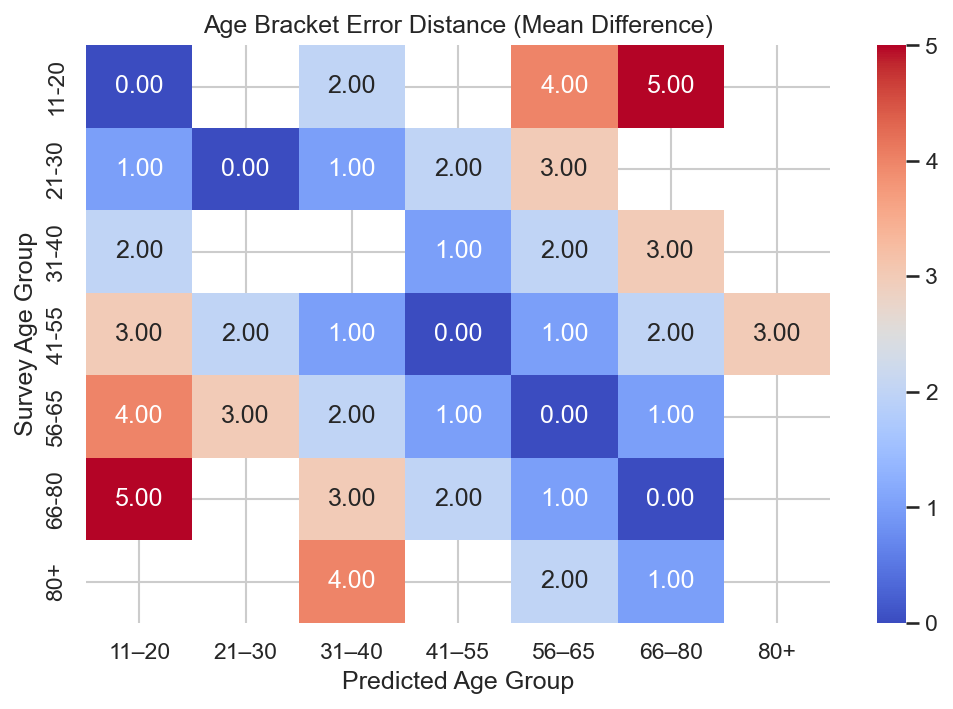

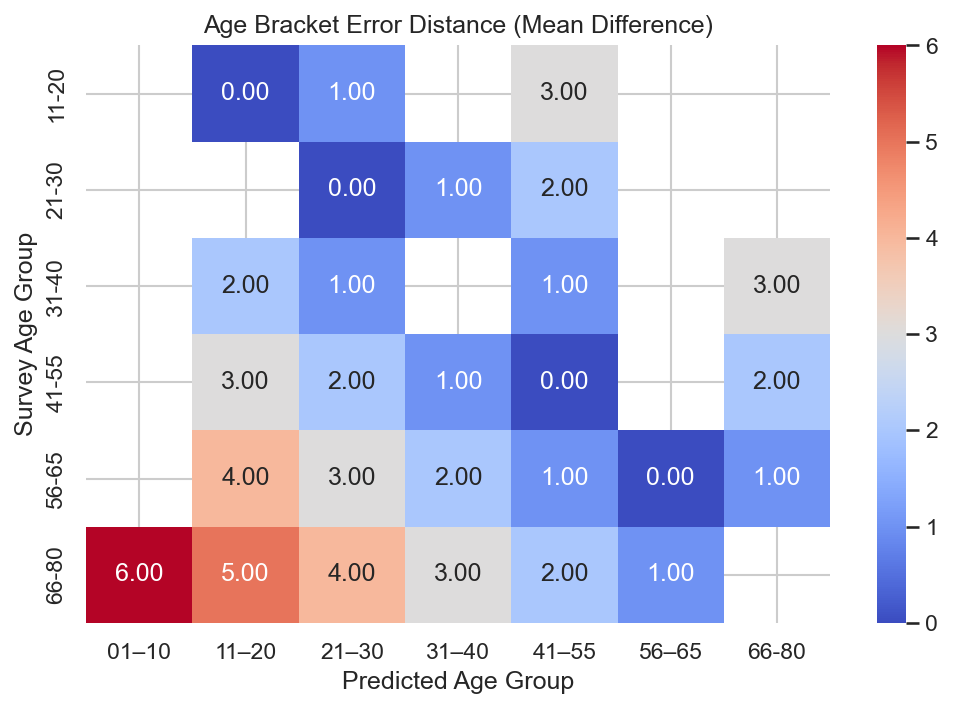

In [12]:
# =====================================================================
# 🔵 SECTION 19 — TRUE MODEL ACCURACY (Survey-Verified)
#     + Enhanced Age Accuracy & Confidence Visualisations
# =====================================================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

plt.rcParams["figure.dpi"] = 150
sns.set(style="whitegrid")

print("\n==============================================================")
print("📊 RUNNING SECTION 19 — TRUE ACCURACY + EXTENDED AGE ANALYTICS")
print("==============================================================")

age_order = ["01–10", "11–20", "21–30", "31–40", "41–55", "56–65", "66–80", "80+"]

def age_to_idx(a):
    if pd.isna(a):
        return None
    a = str(a).replace("-", "–").replace("—", "–").strip()
    return age_order.index(a) if a in age_order else None


# =====================================================================
# PROCESS EACH CSV FILE
# =====================================================================
for f in files:

    print(f"\n➡ Processing Section 19 for: {f}")

    df = pd.read_csv(f)
    model_name = Path(f).stem.replace("results_faces_accounting_", "")

    # ============================================================
    # NEW OUTPUT FOLDER
    # ============================================================
    save_dir = (
        Path(f).parent /
        "evaluation" /
        model_name /
        "accuracy_enhanced"
    )
    save_dir.mkdir(parents=True, exist_ok=True)

    # ============================================================
    # CLEAN FIELDS
    # ============================================================
    df["survey_gender"] = df["survey_gender"].astype(str).str.lower().replace({"nan": None})
    df["predicted_gender"] = df["predicted_gender"].astype(str).str.lower().replace({"nan": None})

    df["survey_age_idx"] = df["survey_age_group"].apply(age_to_idx)
    df["pred_age_idx"] = df["predicted_age"].apply(age_to_idx)

    # Keep only completed surveys
    df_s = df[df["survey_completed"] == True].copy()

    if len(df_s) == 0:
        print("⚠ No survey rows — skipping this model.")
        continue

    # ============================================================
    # TRUE ACCURACY CALCULATIONS
    # ============================================================
    df_s["gender_match"] = df_s["predicted_gender"] == df_s["survey_gender"]
    df_s["age_exact_match"] = df_s["pred_age_idx"] == df_s["survey_age_idx"]

    # Partial match (informational only)
    df_s["age_partial_match"] = (
        df_s["pred_age_idx"].notna()
        & df_s["survey_age_idx"].notna()
        & (df_s["pred_age_idx"] - df_s["survey_age_idx"]).abs().eq(1)
    )

    df_s["overall_match"] = df_s["gender_match"] & df_s["age_exact_match"]

    # Survey rows with valid ages
    df_s2 = df_s.dropna(subset=["survey_age_idx", "pred_age_idx"]).copy()
    df_s2["age_distance"] = (df_s2["pred_age_idx"] - df_s2["survey_age_idx"]).abs()


    # ============================================================
    # 📌 VISUAL 1 — Gender Confusion Matrix
    # ============================================================
    try:
        g_conf = pd.crosstab(df_s["survey_gender"], df_s["predicted_gender"], normalize="index")

        plt.figure(figsize=(4,3))
        sns.heatmap(g_conf, annot=True, fmt=".2f", cmap="Blues", cbar=False)
        plt.title("Gender Confusion Matrix (Survey vs Predicted)")
        plt.ylabel("True (Survey)")
        plt.xlabel("Predicted")
        plt.tight_layout()
        plt.savefig(save_dir / f"{model_name}_gender_confusion.png")
        plt.close()
    except Exception as e:
        print("Error (Gender Confusion):", e)


    # ============================================================
    # 📌 VISUAL 2 — Age Confusion Matrix
    # ============================================================
    try:
        age_matrix = pd.crosstab(
            df_s2["survey_age_group"],
            df_s2["predicted_age"]
        )

        plt.figure(figsize=(8,5))
        sns.heatmap(age_matrix, annot=True, fmt="d", cmap="YlGnBu")
        plt.title("Age Confusion Matrix (Survey vs Predicted)")
        plt.ylabel("Survey Age")
        plt.xlabel("Predicted Age")
        plt.tight_layout()
        plt.savefig(save_dir / f"{model_name}_age_confusion_matrix.png")
        plt.close()
    except Exception as e:
        print("Error (Age Confusion):", e)


    # ============================================================
    # 📌 VISUAL 3 — Age Distance Heatmap
    # ============================================================
    try:
        dist_pivot = df_s2.pivot_table(
            index="survey_age_group",
            columns="predicted_age",
            values="age_distance",
            aggfunc="mean"
        )

        plt.figure(figsize=(8,5))
        sns.heatmap(dist_pivot, annot=True, fmt=".2f", cmap="coolwarm")
        plt.title("Age Bracket Error Distance (Mean Difference)")
        plt.ylabel("Survey Age Group")
        plt.xlabel("Predicted Age Group")
        plt.tight.tight_layout()
        plt.savefig(save_dir / f"{model_name}_age_distance_heatmap.png")
        plt.close()
    except Exception as e:
        print("Error (Age Distance Heatmap):", e)


    # ============================================================
    # 📌 VISUAL 4 — Exact Age Accuracy by Age Group
    # ============================================================
    try:
        acc_by_age = (
            df_s2.assign(correct=(df_s2["pred_age_idx"] == df_s2["survey_age_idx"]))
                 .groupby("survey_age_group")["correct"]
                 .mean()
                 .reindex(age_order)
                 .reset_index()
        )

        plt.figure(figsize=(8,4))
        sns.barplot(data=acc_by_age, x="survey_age_group", y="correct", palette="mako")
        plt.title("Exact Age Accuracy by Survey Age Group")
        plt.ylabel("Accuracy (%)")
        plt.xlabel("Survey Age Group")
        plt.xticks(rotation=35, ha="right")
        plt.ylim(0,1)
        plt.tight_layout()
        plt.savefig(save_dir / f"{model_name}_age_accuracy_by_group.png")
        plt.close()
    except Exception as e:
        print("Error (Age Accuracy by Group):", e)


    # ============================================================
    # 📌 VISUAL 5 — Age Error Distribution Histogram
    # ============================================================
    try:
        plt.figure(figsize=(7,4))
        sns.histplot(df_s2["age_distance"], kde=True, bins=20, color="teal")
        plt.title("Distribution of Age Prediction Error (Bracket Distance)")
        plt.xlabel("Bracket Difference (0 = Exact Match)")
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.savefig(save_dir / f"{model_name}_age_error_distribution.png")
        plt.close()
    except Exception as e:
        print("Error (Age Error Histogram):", e)


    # ============================================================
    # 📌 VISUAL 6 — Error Breakdown (Exact vs ±1 vs >1)
    # ============================================================
    try:
        df_s2["error_class"] = df_s2["age_distance"].apply(
            lambda x: "Exact" if x == 0 else ("±1 Bracket" if x == 1 else ">1 Bracket")
        )

        error_counts = (
            df_s2["error_class"]
            .value_counts(normalize=True)
            .reindex(["Exact", "±1 Bracket", ">1 Bracket"])
        )

        plt.figure(figsize=(6,4))
        sns.barplot(
            x=error_counts.index,
            y=error_counts.values,
            palette=["#2b83ba", "#abdda4", "#fdae61"]
        )
        plt.title("Age Prediction Error Breakdown")
        plt.ylabel("Proportion")
        plt.ylim(0,1)
        plt.tight_layout()
        plt.savefig(save_dir / f"{model_name}_age_error_breakdown.png")
        plt.close()
    except Exception as e:
        print("Error (Age Error Breakdown):", e)


    # ============================================================
    # 📌 VISUAL 7 — Accuracy Summary Chart
    # ============================================================
    try:
        summary = pd.DataFrame({
            "Metric": [
                "Gender Accuracy (%)",
                "Age Accuracy – Exact (%)",
                "Age Partial Match (%)",
                "Overall Accuracy (%)"
            ],
            "Value": [
                df_s["gender_match"].mean()*100,
                df_s["age_exact_match"].mean()*100,
                df_s["age_partial_match"].mean()*100,
                df_s["overall_match"].mean()*100
            ]
        })

        plt.figure(figsize=(8,4))
        sns.barplot(data=summary, x="Metric", y="Value", palette="Purples")
        plt.title("Model Accuracy Summary (Survey-Verified)")
        plt.ylabel("Percentage (%)")
        plt.xticks(rotation=30, ha="right")
        plt.tight_layout()
        plt.savefig(save_dir / f"{model_name}_accuracy_summary.png")
        plt.close()

        summary.to_csv(save_dir / f"{model_name}_accuracy_results.csv", index=False)

    except Exception as e:
        print("Error (Accuracy Summary):", e)


    # ============================================================
    # 📌 NEW CONFIDENCE VISUALS
    # ============================================================

    # Clean confidence
    df_s2["age_confidence"] = pd.to_numeric(df_s2.get("age_confidence"), errors="coerce")

    df_conf = df_s2.dropna(subset=["age_confidence", "predicted_gender", "predicted_age"]).copy()

    # ------------------------------------------------------------
    # 8️⃣ Age Confidence by Predicted Gender
    # ------------------------------------------------------------
    try:
        plt.figure(figsize=(6,4))
        sns.boxplot(
            data=df_conf,
            x="predicted_gender",
            y="age_confidence",
            palette="coolwarm"
        )
        plt.title("Age Confidence by Predicted Gender")
        plt.ylabel("Age Confidence Score")
        plt.xlabel("Predicted Gender")
        plt.ylim(0,1)
        plt.tight_layout()
        plt.savefig(save_dir / f"{model_name}_age_confidence_by_gender.png")
        plt.close()
    except Exception as e:
        print("Error (Age Confidence by Gender):", e)


    # ------------------------------------------------------------
    # 9️⃣ Age Confidence by Age Group
    # ------------------------------------------------------------
    try:
        plt.figure(figsize=(10,4))
        sns.boxplot(
            data=df_conf,
            x="predicted_age",
            y="age_confidence",
            order=age_order,
            palette="viridis"
        )
        plt.title("Age Confidence by Predicted Age Group")
        plt.ylabel("Age Confidence Score")
        plt.xlabel("Predicted Age Group")
        plt.ylim(0,1)
        plt.xticks(rotation=35, ha="right")
        plt.tight_layout()
        plt.savefig(save_dir / f"{model_name}_age_confidence_by_age.png")
        plt.close()
    except Exception as e:
        print("Error (Age Confidence by Age Group):", e)


    # ------------------------------------------------------------
    # 🔟 Age Confidence Distribution Histogram
    # ------------------------------------------------------------
    try:
        plt.figure(figsize=(7,4))
        sns.histplot(
            df_conf["age_confidence"],
            kde=True,
            bins=20,
            color="purple",
            alpha=0.7
        )
        plt.title("Age Confidence Distribution")
        plt.xlabel("Age Confidence Score")
        plt.ylabel("Count")
        plt.xlim(0,1)
        plt.tight_layout()
        plt.savefig(save_dir / f"{model_name}_age_confidence_distribution.png")
        plt.close()
    except Exception as e:
        print("Error (Age Confidence Distribution):", e)


print("\n✅ SECTION 19 COMPLETE — Enhanced Accuracy & Confidence Visualisations Saved\n")


In [13]:
# ===============================================================
# EXACT AGE ACCURACY BY SURVEY AGE GROUP (FULL WORKING VERSION)
# ===============================================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

plt.rcParams["figure.dpi"] = 150
sns.set(style="whitegrid")

# -----------------------------
# STANDARD AGE ORDER
# -----------------------------
age_order = ["01–10","11–20","21–30","31–40","41–55","56–65","66–80","80+"]


# -----------------------------
# ROBUST NORMALISATION FUNCTION
# -----------------------------
def normalize_age_label(x):
    if pd.isna(x):
        return None
    
    x = str(x).strip().replace(" ", "")
    x = x.replace("–", "-").replace("—", "-")  # unify dash variants

    # accepted variants mapped to thesis format
    mapping = {
        "1-10":"01–10", "01-10":"01–10", "0-10":"01–10",

        "11-20":"11–20", "11_20":"11–20",

        "21-30":"21–30", "21_30":"21–30",

        "31-40":"31–40", "31_40":"31–40",

        "41-55":"41–55",

        "56-65":"56–65",

        "66-80":"66–80",

        "80plus":"80+", "80+":"80+", "80-100":"80+"
    }

    if x in mapping:
        return mapping[x]

    # already in correct format?
    if x in age_order:
        return x

    return None


def age_to_idx(a):
    if a in age_order:
        return age_order.index(a)
    return None


# -----------------------------
# LOAD CSV
# -----------------------------
csv_path = "your_file.csv"   # <<< UPDATE THIS
df = pd.read_csv(csv_path)

# -----------------------------
# NORMALISE AGE LABELS
# -----------------------------
df["norm_survey_age"] = df["survey_age_group"].apply(normalize_age_label)
df["norm_pred_age"]  = df["predicted_age"].apply(normalize_age_label)

df["survey_age_idx"] = df["norm_survey_age"].apply(age_to_idx)
df["pred_age_idx"]   = df["norm_pred_age"].apply(age_to_idx)

# Keep only completed survey rows
df_s = df[df["survey_completed"] == True].copy()

# Keep rows where both ages are valid
df_s2 = df_s.dropna(subset=["survey_age_idx","pred_age_idx"]).copy()

if df_s2.empty:
    print("⚠ No valid rows for accuracy calculation.")
else:

    # ----------------------------------------------------------
    # CALCULATE EXACT MATCH ACCURACY BY SURVEY AGE GROUP
    # ----------------------------------------------------------
    df_s2["correct"] = df_s2["survey_age_idx"] == df_s2["pred_age_idx"]

    acc_by_age = (
        df_s2.groupby("norm_survey_age")["correct"]
             .mean()
             .reindex(age_order)
             .dropna()
    )

    # -----------------------------
    # CREATE OUTPUT FOLDER
    # -----------------------------
    out_dir = Path(csv_path).parent / "age_accuracy_eval"
    out_dir.mkdir(exist_ok=True)

    # -----------------------------
    # PLOT ACCURACY BAR CHART
    # -----------------------------
    plt.figure(figsize=(10,5))
    sns.barplot(x=acc_by_age.index, y=acc_by_age.values, palette="magma")
    plt.title("Exact Age Accuracy by Survey Age Group")
    plt.ylabel("Accuracy (%)")
    plt.xlabel("Survey Age Group")
    plt.ylim(0, 1)
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()

    plt.savefig(out_dir / "exact_age_accuracy_by_group.png")
    plt.close()

    print(f"✔ Saved: {out_dir / 'exact_age_accuracy_by_group.png'}")
    print(acc_by_age)


FileNotFoundError: [Errno 2] No such file or directory: 'your_file.csv'

In [14]:
files = [
    '../results/combined_dates/combined_dates_final.csv',
    '../results/combined_dates/combined_dates_vit_final.csv',
]


In [15]:
# ===============================================================
# EXACT AGE ACCURACY BY SURVEY AGE GROUP (READY TO RUN VERSION)
# ===============================================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

plt.rcParams["figure.dpi"] = 150
sns.set(style="whitegrid")

# Your known dataset
csv_path = "../results/combined_dates/combined_dates_final.csv"

# -----------------------------
# STANDARD AGE ORDER
# -----------------------------
age_order = ["01–10","11–20","21–30","31–40","41–55","56–65","66–80","80+"]


# -----------------------------
# ROBUST NORMALISATION FUNCTION
# -----------------------------
def normalize_age_label(x):
    if pd.isna(x):
        return None
    
    x = str(x).strip().replace(" ", "")
    x = x.replace("–", "-").replace("—", "-")  # unify dashes

    mapping = {
        "1-10":"01–10", "01-10":"01–10", "0-10":"01–10",

        "11-20":"11–20", "11_20":"11–20",

        "21-30":"21–30", "21_30":"21–30",

        "31-40":"31–40", "31_40":"31–40",

        "41-55":"41–55",
        "56-65":"56–65",
        "66-80":"66–80",

        "80plus":"80+", "80+":"80+", "80-100":"80+",
    }

    if x in mapping:
        return mapping[x]

    if x in age_order:
        return x

    return None


def age_to_idx(a):
    if a in age_order:
        return age_order.index(a)
    return None


# -----------------------------
# LOAD CSV
# -----------------------------
df = pd.read_csv(csv_path)

# -----------------------------
# NORMALISE AGE LABELS
# -----------------------------
df["norm_survey_age"] = df["survey_age_group"].apply(normalize_age_label)
df["norm_pred_age"]  = df["predicted_age"].apply(normalize_age_label)

df["survey_age_idx"] = df["norm_survey_age"].apply(age_to_idx)
df["pred_age_idx"]   = df["norm_pred_age"].apply(age_to_idx)

# Filter: only completed survey rows
df_s = df[df["survey_completed"] == True].copy()

# Rows where both ages exist
df_s2 = df_s.dropna(subset=["survey_age_idx","pred_age_idx"]).copy()

if df_s2.empty:
    print("⚠ No valid rows for accuracy calculation.")
else:

    # ----------------------------------------------------------
    # CALCULATE EXACT MATCH ACCURACY BY SURVEY AGE GROUP
    # ----------------------------------------------------------
    df_s2["correct"] = df_s2["survey_age_idx"] == df_s2["pred_age_idx"]

    acc_by_age = (
        df_s2.groupby("norm_survey_age")["correct"]
             .mean()
             .reindex(age_order)
             .dropna()
    )

    # -----------------------------
    # OUTPUT DIRECTORY
    # -----------------------------
    out_dir = Path(csv_path).parent / "age_accuracy_eval"
    out_dir.mkdir(exist_ok=True)

    # -----------------------------
    # PLOT ACCURACY BAR CHART
    # -----------------------------
    plt.figure(figsize=(10,5))
    sns.barplot(x=acc_by_age.index, y=acc_by_age.values, palette="magma")
    plt.title("Exact Age Accuracy by Survey Age Group")
    plt.ylabel("Accuracy (%)")
    plt.xlabel("Survey Age Group")
    plt.ylim(0, 1)
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()

    outfile = out_dir / "exact_age_accuracy_by_group.png"
    plt.savefig(outfile)
    plt.close()

    print(f"✔ Saved: {outfile}")
    print(acc_by_age)


C:\Users\mrosk\AppData\Local\Temp\ipykernel_4904\3279057580.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=acc_by_age.index, y=acc_by_age.values, palette="magma")


✔ Saved: ..\results\combined_dates\age_accuracy_eval\exact_age_accuracy_by_group.png
norm_survey_age
11–20    0.200000
21–30    0.205128
31–40    0.000000
41–55    0.039548
56–65    0.300546
66–80    0.418440
80+      0.000000
Name: correct, dtype: float64
